<h1>Module Description</h1>

The module is the solution to the [titanic problem on Kaggle](https://www.kaggle.com/c/titanic). 

"<em>The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).</em>"

Solved by **Kasian Aleksandr**

## Table of Contents
- [Module Description](#Module-Description)
    - [Import Libraries](#Import-Libraries)
    - [Set Plot Associates's Style](#Set-Plot-Associates's-Style)
    - [Definition of functions responsible for the charts representation](#Definition-of-functions-responsible-for-the-charts-representation)
        - [Boxplot](#Boxplot)
        - [Corrplot](#Corrplot)
        - [Barplot](#Barplot)
    - [Extract the data](#Extract-the-data)
    - [Solving missing data problem](#Solving-missing-data-problem)
        - [Embarked NaN](#Embarked-NaN)
        - [Age NaN](#Age-NaN)
            - [Statistical Analysis](#Statistical-Analysis)
                - [A class reflects a social class of a passenger](#A-class-reflects-a-social-class-of-a-passenger)
                - [The Fare doesn't influences somehow to the age](#The-Fare-doesn't-influences-somehow-to-the-age)
                - [The Pclass influences somehow to the Age](#The-Pclass-influences-somehow-to-the-Age-and-does-significantly)
                - [Honorifics](#Honorifics)
        - [Fare Zeros](#Fare-Zeros)
        - [Cabin NaN](#Cabin-NaN)
    - [Data Analysis](#Data-Analysis)
        - [Base dependecies](#Base-dependecies)
        - [More complex dependencies](#More-complex-dependencies)
            - [A sex is influencing on the survival chances](#A-sex-is-influencing-on-the-survival-chances)
            - [Than Higher class then higher chance to survive](#Than-Higher-class-then-higher-chance-to-survive)
            - [Younger have more chances to survive rather than maturer](#Younger-have-more-chances-to-survive-rather-than-maturer)
            - [Embarked affects to the survival](#Embarked-affects-to-the-survival)
            - [Arbitrary Correlation Matrix](#Arbitrary-Correlation-Matrix)
            - [Honorifics analysis](#Honorifics-analysis)
            - [Distribution died and alive per sex and class](#Distribution-died-and-alive-per-sex-and-class)
            - [Survival chances depends on family's presence](#Survival-chances-depends-on-family's-presence)
                - [Statistical Analysis](#Statistical-Analysis-2)
                    - [The honorific class affects to the survival](#The-honorific-class-affects-to-the-survival)
                    - [Family presence affects to the survival](#Family-presence-affects-to-the-survival)
                    - [Family presence at women affects to the survival](#Family-presence-at-women-affects-to-the-survival)
            - [Family presence feature](#Family-presence-feature)
                - [Statistical Analysis](#Statistical-Analysis-3)
            - [Cabin again](#Cabin-again)

<h2>Import Libraries</h2>

1. The first library is the **[pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)** uses for comfortable data handling.
2. The second one is **[matplotlib-pyplot](https://matplotlib.org/3.3.0/)** this is a way to represent a data on a chart.
3. **[Numpy package](https://numpy.org/)** for array's handling.
4. Also retrieve **[MaxNLocator](https://matplotlib.org/3.1.1/api/ticker_api.html#matplotlib.ticker.MaxNLocator)** and **[StrMethodFormatter](https://matplotlib.org/3.1.1/api/ticker_api.html#matplotlib.ticker.StrMethodFormatter)** from **[Matplotlib ticker](https://matplotlib.org/3.1.1/api/ticker_api.html)**

In [157]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator, StrMethodFormatter
import math
from scipy import stats
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)


from sklearn.metrics import (confusion_matrix, accuracy_score) 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.special import expit
import statsmodels.discrete.discrete_model as smf
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.model_selection import RepeatedStratifiedKFold

<h2>Set Plot Associates's Style</h2>

This sections contains plot's design settings.

The base style is *seaborn-dark*:

Defining by `plt.style.use('seaborn-dark')`

![sphx_glr_style_sheets_reference](https://matplotlib.org/3.2.1/_images/sphx_glr_style_sheets_reference_014.png)

Also I define the function `def plot_style(plot_type, **kwargs)` which extracts a style depending on plot's type.
The function admits the type of a plot and style's setting (`**kwargs`). 

Currently, it can handle:
1. **[Box plot](https://en.wikipedia.org/wiki/Box_plot)**
2. **[Bar plot](https://en.wikipedia.org/wiki/Bar_chart)**

For the **boxplot** appear default styles.
* Box
    - The inner color of a box is `#3F7FBF`
    - The edge and hatch colors are `black`
    - The width of the lines is `1.5`
    - No hatch by default
* Medians
    - The median is the one `solid` line
    - The width of the lines is `1.5`
    - The color of a median is `black`
* Mean
    - The median is the one `dashed` line
    - The width of the lines is `1.5`
    - The color of a median is `white
* Outliers
    - The shape is the `circle`
    - The color is `red`
* Whiskers
    - Set by default with matplotlib default values
* Caps
    - Set by default with matplotlib default values
    
For the **barplot** also appear default styles.
* Color
    - The `#3F7FBF` color defined by default
* Edge color
    - The `black` color defined by default
* Line width
    - The width is `1.5` by default
* Tick label
    - Set as `None` by default
* Orientation
    - Set as `vertical` by default

In [158]:
plt.style.use('seaborn-dark')

In [159]:
# https://python-graph-gallery.com/cheat-sheets/

def plot_style(plot_type, **kwargs):
    """Select a style depending on plot type.
    
    :param plot_type: the type of plot passed as string. If type is not found an error will be raised.
    (histplot, boxplot, barplot, etc.)
    
    **kwargs: kwargs depends on plot's type, due to different parameters in different plots.
    1. boxplot:
    :kwargs-param boxes_style:
    :kwargs-param medians_style:
    :kwargs-param means_style:
    :kwargs-param outlires_style:
    :kwargs-param whiskers_style:
    :kwargs-param caps_style:
    :kwargs-param additional_styles:
    2. barplot:
    
            
    :return: a style with adjusted parameters.
    """
    default_style = {
        # boxplot default style
        'boxplot':{
                 'boxes_style': dict(facecolor='#3F7FBF', color='black', linewidth=1.5, hatch=''),
                 'medians_style': dict(linestyle='-', linewidth=1.5, color='black'),
                 'means_style': dict(linestyle='--', linewidth=1.5, color='white'),
                 'outlires_style': dict(marker='o', markeredgecolor='r'),
                 'whiskers_style': dict(),
                 'caps_style': dict(),
                 'additional_styles': dict(colorsdict=[], edgecolor='black')
                 },
        'barplot':{
                 'color': '#3F7FBF',
                 'edgecolor': 'black',
                 'linewidth': 1.5,
                 'tick_label': None,
                 'orientation': 'vertical',
                 'ecolor': 'black',
                 'capsize': None,
                 'error_kw': dict(color='black')
                 }
                }
    
    if plot_type in default_style:
        for field, value in default_style[plot_type].items():
            if type(value) == dict:
                if field in kwargs:
                    default_style[plot_type][field].update(kwargs[field])
            else:
                if field in kwargs:
                    default_style[plot_type][field] = kwargs[field]
    else:
        raise Exception('Wrong type of a plot.')
    return default_style[plot_type]

<h2>Definition of functions responsible for the charts representation</h2>

<h3><a href='https://en.wikipedia.org/wiki/Box_plot'>Boxplot</a></h3>

In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points. Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution (though Tukey's boxplot assumes symmetry for the whiskers and normality for their length). The spacings between the different parts of the box indicate the degree of dispersion (spread) and skewness in the data, and show outliers. In addition to the points themselves, they allow one to visually estimate various L-estimators, notably the interquartile range, midhinge, range, mid-range, and trimean. Box plots can be drawn either horizontally or vertically. Box plots received their name from the box in the middle.

![bp](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

In [160]:
def boxplot(data, labels, title, ax=None, sym='', notch=False, showfliers=False, showmeans=False, 
            showcaps=True, showbox=True, widths=0.5, x_label='', y_label='', annotate=False, **styles):
    """The function represents a boxplot.
    
    :param data: 2D-array data you whish to plot.
    :param labels: labales along x-axis
    :param title: title of a plot
    :param axes: the axes where a boxplot shall be represented. If it's not defined then choose the current one `plt.gca()`
    :param sym: the sym passes as sym to the 'Axes.boxplot' and defines how the outliers looks like 
    :param notch: the notches represent the confidence interval (CI) around the median.
    :param showfliers: show outliers
    :param showmeans: show mean (represents as a dot), however I did as dash-line
    :param showcaps: show caps at the ends of whiskers.
    :param showbox: show the very box
    :param x_label: label of the x-axis
    :param y_label: label of the y-axis
    :param annotate: annotation within a plot
     
     **styles:
     :param boxes_style: dict
                 The styles for boxes
                 
     :param medians_style: dict
                 The styles for medians
                 
     :param means_style: dict
                 The styles for means
                 
     :param outlires_style: dict
                 The styles for outliers
                 
     :param whiskers_style: dict
                 The styles for whiskers
                 
     :param caps_style: dict
                 The styles for caps
                 
     :param additional_styles: dict
                 Styles, for boxes if you wanna so boxes would be different
                 
     :param annotate_params: dict
                 Styles and parameters for the annotation
                 
     :kwparam title_font: nt, default: 20
                 The font of the title
    
     :kwparam y_label_font: int, default: 20
                 The font of the y-axis's label
    
     :kwparam x_label_font: int, default: 20
                 The font of the x-axis's label
     
     :return: box's dict
    """
    def annotate_boxplot(ax, bpdict, annotate_params=None, x_loc=0, text_offset_x=35, text_offset_y=0):
        """Annotates a matplotlib boxplot with labels marking various centile levels.

        Parameters:
        - bpdict: The dict returned from the matplotlib `boxplot` function. If you're using pandas you can
        get this dict by setting `return_type='dict'` when calling `df.boxplot()`.
        - annotate_params: Extra parameters for the plt.annotate function. The default setting uses standard arrows
        and offsets the text based on other parameters passed to the function
        - x_loc: The x axis location of the boxplot to annotate. Usually just the number of the boxplot, counting
        from the left and starting at zero.
        text_offset_x: The x offset from the arrow head location to place the associated text, in 'figure points' units
        text_offset_y: The y offset from the arrow head location to place the associated text, in 'figure points' units
        """
        
        # define parameters for annotation
        if annotate_params is None:
            annotate_params = dict(xytext=(text_offset_x, text_offset_y), textcoords='offset points', arrowprops={'arrowstyle':'->'}, **dict(fontsize=13))

        # Annotate entire box
        ax.annotate(
            'Median (~{})'.format(int(bpdict['medians'][x_loc].get_ydata()[0])), 
            (bpdict['boxes'][x_loc].get_path().get_extents().intervalx[1], bpdict['medians'][x_loc].get_ydata()[0]), 
            **annotate_params
        )
        ax.annotate(
            '25% (~{})'.format(int(bpdict['boxes'][x_loc].get_path().get_extents().intervaly[0])), 
            (bpdict['boxes'][x_loc].get_path().get_extents().intervalx[1], bpdict['boxes'][x_loc].get_path().get_extents().intervaly[0]), 
            **annotate_params
        )
        ax.annotate(
            '75% (~{})'.format(int(bpdict['boxes'][x_loc].get_path().get_extents().intervaly[1])), 
            (bpdict['boxes'][x_loc].get_path().get_extents().intervalx[1], bpdict['boxes'][x_loc].get_path().get_extents().intervaly[1]),
            **annotate_params
        )
        if len(bpdict['means']) > 0:
            ax.annotate(
                'Mean (~{})'.format(int(bpdict['means'][x_loc].get_ydata()[0])), 
                (bpdict['boxes'][x_loc].get_path().get_extents().intervalx[1], bpdict['means'][x_loc].get_ydata()[0]), 
                **dict(xytext=(text_offset_x, (bpdict['boxes'][x_loc].get_path().get_extents().intervaly[1] +  bpdict['medians'][x_loc].get_ydata()[0]) / 2), textcoords='offset points', arrowprops={'arrowstyle':'->'}, **dict(fontsize=13))
            )
        ax.annotate(
            '95% (~{})'.format(int(bpdict['caps'][(x_loc*2)+1].get_ydata()[0])), 
            (bpdict['boxes'][x_loc].get_path().get_extents().intervalx[1], bpdict['caps'][(x_loc*2)+1].get_ydata()[0]), 
            **annotate_params
        )
        ax.annotate(
            '5% (~{})'.format(int(bpdict['caps'][x_loc*2].get_ydata()[0])), 
            (bpdict['boxes'][x_loc].get_path().get_extents().intervalx[1], bpdict['caps'][x_loc*2].get_ydata()[0]),
            **annotate_params
        )

    # Set the base axis
    if ax is None:
        ax = plt.gca()
    
    # Obtain styles for a plot
    plt_styles = plot_style('boxplot', **styles)
    
    # Plot boxes
    bdict = ax.boxplot(
        data,
        labels=labels,
        vert=True,
        notch=notch,
        sym=sym,
        widths=widths,
        patch_artist=True,
        showfliers=showfliers,
        showmeans=showmeans,
        showcaps=showcaps,
        showbox=showbox,
        meanline=True,
        boxprops=plt_styles['boxes_style'],
        medianprops=plt_styles['medians_style'],
        meanprops=plt_styles['means_style'],
        capprops=plt_styles['caps_style'],
        whiskerprops=plt_styles['whiskers_style'],
        flierprops=plt_styles['outlires_style'],       
    )
    
    # Box's color filling and edges coloring.
    #==========================================================================================================================#
    # If list of colors were passed then fill the boxes
    if len(plt_styles['additional_styles']['colorsdict']) > 0:
        
        # Adjust quantity of colors to number of boxes within a plot.
        # The colorsdict has to be only the dictionary, otherwise error is occured
        if type(plt_styles['additional_styles']['colorsdict']) == list:
            
            # Check whether number of boxes coincides w/ quantity of colors. 
            # In the way if it doesn't we adjust the it.
            if len(plt_styles['additional_styles']['colorsdict']) != len(bdict['boxes']):
                
                # If number of colors is less then the number of boxes then fill (extend) w/ the colors 
                # from the head of colorsarr over the remain boxes.
                if len(plt_styles['additional_styles']['colorsdict']) < len(bdict['boxes']):
                    plt_styles['additional_styles']['colorsdict'].extend(
                        (plt_styles['additional_styles']['colorsdict'][:(len(bdict['boxes']) - len(plt_styles['additional_styles']['colorsdict']))]))
    
                # Otherwise (if only bigger) delete redundant colors
                else:
                    del plt_styles['additional_styles']['colorsdict'][len(bdict['boxes']):]
        else:
            raise Exception("Wrong type of colorsdict the only list is admitted") 
            
        # Adjust quantity of edgecolors to number of boxes within a plot, if edgecolor is the list, of course.
        # In fact, do the same actions as above.
        if type(plt_styles['additional_styles']['edgecolor']) == list:
            if len(plt_styles['additional_styles']['edgecolor']) != len(bdict['boxes']):
                if len(plt_styles['additional_styles']['edgecolor']) < len(bdict['boxes']):
                    plt_styles['additional_styles']['edgecolor'].extend(
                        (plt_styles['additional_styles']['edgecolor'][:(len(bdict['boxes']) - len(plt_styles['additional_styles']['edgecolor']))]))
                else:
                    del plt_styles['additional_styles']['edgecolor'][len(bdict['boxes']):]
                    
        # If edgecolor has been passed as string stretch it to the list
        elif type(plt_styles['additional_styles']['edgecolor']) == str:
            plt_styles['additional_styles']['edgecolor'] = [plt_styles['additional_styles']['edgecolor']] * len(bdict['boxes'])
        else:
            raise Exception("Wrong type of edge color the only string or list are admitted")
            
        # Fill the boxes
        for box, fcolor, ecolor in zip(bdict['boxes'], plt_styles['additional_styles']['colorsdict'], plt_styles['additional_styles']['edgecolor']):
            box.set(color=ecolor)
            box.set(facecolor=fcolor)
    #==========================================================================================================================#

    # Annotate boxes
    if annotate:
        
        # If parameters for annotation were passed - obtain them
        ann_params = styles['annotate_params'] if 'annotate_params' in styles else None
        length = len(bdict['medians'])
        for i in range(length):
            annotate_boxplot(ax, bdict, x_loc=i, annotate_params=ann_params)
    
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.set_tick_params(labelsize=16)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.set_title(title, fontsize=20 if 'title_font' not in styles else styles['title_font'])
    ax.set_ylabel(y_label, fontsize=20 if 'y_label_font' not in styles else styles['y_label_font'])   
    ax.set_xlabel(x_label, fontsize=20 if 'x_label_font' not in styles else styles['x_label_font'])
    
    return bdict

<a href="https://en.wikipedia.org/wiki/Heat_map"><h3>Corrplot</h3></a>

Specifically the correlation plot is the type of the heatmaps.

A heat map (or heatmap) is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.

* A density function visualization is a heat map for representing the density of dots in a map. It enables one to perceive density of points independently of the zoom factor.

![heatmap](https://www.displayr.com/wp-content/uploads/2018/09/rat-burrough-heatmap-1.png)

Copied from [here](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py)

In [161]:
def corrplot(data, title="", ax=None, cbar_kw={}, cbarlabel="", squared=False, text_kw={}, valfmt="{x:.2f}", **kwargs):
    """Correlation plot (heatmap) 
    
    :param data: 2D-np.array/pandas Dataframe
    :param title: plot title
    :param ax: current axes
    :param cbar_kw: color bar parameters
    :param cbarlabel: label of a colorbar
    :param text_kw: parameters for annotation
    :param valfmt: The format of the annotations inside the heatmap.
    
    **kwargs: All other arguments are forwarded to `imshow`.
    
    """
    def heatmap(data, row_labels, col_labels, _ax=None, cbar_kw={}, cbarlabel="", **kwargs):
        """
        Create a heatmap from a numpy array and two lists of labels.

        Parameters
        ----------
        data
            A 2D numpy array of shape (N, M).
        row_labels
            A list or array of length N with the labels for the rows.
        col_labels
            A list or array of length M with the labels for the columns.
        ax
            A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
            not provided, use current axes or create a new one.  Optional.
        cbar_kw
            A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
        cbarlabel
            The label for the colorbar.  Optional.
        **kwargs
            All other arguments are forwarded to `imshow`.
        """

        if not _ax:
            _ax = plt.gca()
        # Plot the heatmap
        im = _ax.matshow(data, **kwargs)

        # Create colorbar
        cbar = _ax.figure.colorbar(im, ax=ax, **cbar_kw)
        cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize=16)

        # We want to show all ticks...
        _ax.set_xticks(np.arange(data.shape[1]))
        _ax.set_yticks(np.arange(data.shape[0]))
        # ... and label them with the respective list entries.
        _ax.set_xticklabels(col_labels, fontsize=16)
        _ax.set_yticklabels(row_labels, fontsize=16)

        # Let the horizontal axes labeling appear on top.
        _ax.tick_params(top=True, bottom=False,
                       labeltop=True, labelbottom=False)

        # Rotate the tick labels and set their alignment.
        plt.setp(_ax.get_xticklabels(), rotation=-30, ha="right",
                 rotation_mode="anchor")

        # Turn spines off and create white grid.
        for edge, spine in _ax.spines.items():
            spine.set_visible(False)

        _ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
        _ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
        _ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
        _ax.tick_params(which="minor", bottom=False, left=False)

        return im, cbar


    def annotate_heatmap(im, data=None, valfmt="{x:.2f}", textcolors=["black", "white"], threshold=None, **textkw):
        """
        A function to annotate a heatmap.

        Parameters
        ----------
        im
            The AxesImage to be labeled.
        data
            Data used to annotate.  If None, the image's data is used.  Optional.
        valfmt
            The format of the annotations inside the heatmap.  This should either
            use the string format method, e.g. "$ {x:.2f}", or be a
            `matplotlib.ticker.Formatter`.  Optional.
        textcolors
            A list or array of two color specifications.  The first is used for
            values below a threshold, the second for those above.  Optional.
        threshold
            Value in data units according to which the colors from textcolors are
            applied.  If None (the default) uses the middle of the colormap as
            separation.  Optional.
        **kwargs
            All other arguments are forwarded to each call to `text` used to create
            the text labels.
        """

        if not isinstance(data, (list, np.ndarray)):
            data = im.get_array()

        # Normalize the threshold to the images color range.
        if threshold is not None:
            threshold = im.norm(threshold)
        else:
            threshold = im.norm(data.max())/2.

        # Set default alignment to center, but allow it to be
        # overwritten by textkw.
        kw = dict(horizontalalignment="center",
                  verticalalignment="center")
        kw.update(textkw)

        # Get the formatter in case a string is supplied
        if isinstance(valfmt, str):
            valfmt = StrMethodFormatter(valfmt)

        # Loop over the data and create a `Text` for each "pixel".
        # Change the text's color depending on the data.
        texts = []
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
                text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
                texts.append(text)

        return texts
    
    im, cbar = heatmap(data.corr()**2 if squared else data.corr(), data.columns, data.columns, _ax=ax, cbar_kw=cbar_kw, cbarlabel=cbarlabel, **kwargs)
    texts = annotate_heatmap(im, valfmt=valfmt, **text_kw)
    ax.set_title(title, fontsize=20)
    
    return im, cbar

<a href="https://en.wikipedia.org/wiki/Bar_chart"><h3>Barplot</h3></a>

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart.

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value. Some bar graphs present bars clustered in groups of more than one, showing the values of more than one measured variable.

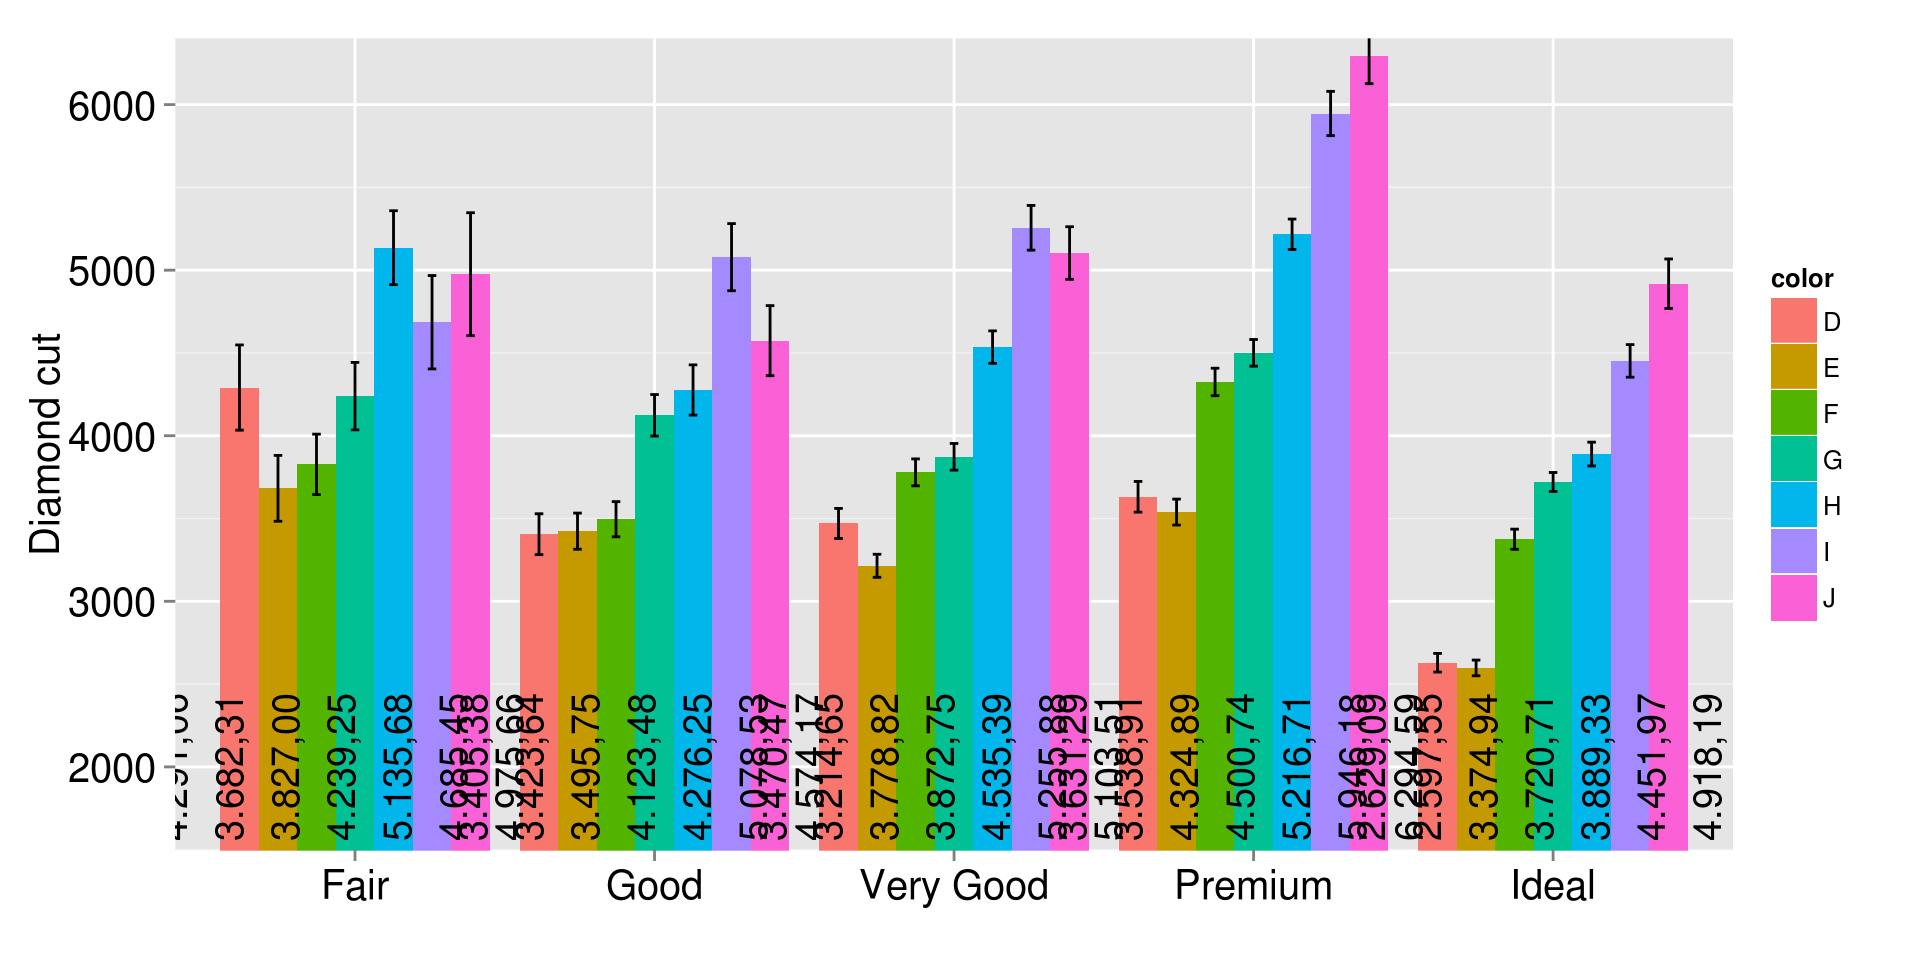

In [162]:
def barplot(data, height, title, y_label='', x_label='', width=0.8, ax=None, bottom=0, align='center', legend=False, label=None, log=False, xerr=None, yerr=None, annotate=False, **kwargs):
    """Represetns a barplot with passed styles.
    
    :param data: the x coordinates of the bars. See also align for the alignment of the bars to the coordinates.
    
    :param height: the height(s) of the bars.
    
    :param title: title for a plot
    
    :param y_label: label for the y-axis (default: '')
    
    :param x_label: label for the x-axis (default: '')
    
    :param width: the width(s) of the bars (default: 0.8)
    
    :param ax: the axes where plot shall be shown (default: None)
    
    :param botom: the y coordinate(s) of the bars bases (default: 0)
    
    :param align: {'center', 'edge'}, optional, default: 'center'
                  Alignment of the bars to the x coordinates:
                    * 'center': Center the base on the x positions.
                    * 'edge': Align the left edges of the bars with the x positions.
                  To align the bars on the right edge pass a negative width and align='edge'.
    
    :param legend: Represent a legend; default: False
    
    :param label: a label for the legend; default: None
    
    :param log: bool, optional, default: False
                If True, set the y-axis to be log scale.
                
    :param annotate: True, False default: False
                     Do you want to annotate the bars
                     
    :param xerr, yerr: scalar or array-like of shape(N,) or shape(2,N), optional
    ================================================================================================
    |**kwargs: Styeles for bar and text                                                            |
    ================================================================================================
    :kwparam color: scalar or array-like, optional
                The colors of the bar faces.
                
    :kwparam edgecolor: scalar or array-like, optional
                The colors of the bar edges.
                
    :kwparam linewidth: scalar or array-like, optional
                Width of the bar edge(s). If 0, don't draw edges.
                
    :kwparam tick_label: string or array-like, optional
                    The tick labels of the bars. Default: None (Use default numeric labels.)
                    
    :kwparam orientation: 'vertical'/'horisontal', default: 'vertical'
                Bar's orientation
    
    :kwparam annotate_params: dict, default: None
                The styles and parameters for the bar's annotation
                
    :kwparam title_font: nt, default: 20
                The font of the title
    
    :kwparam y_label_font: int, default: 20
                The font of the y-axis's label
    
    :kwparam x_label_font: int, default: 20
                The font of the x-axis's label
                
    :kwparam ecolor: scalar or array-like, optional, default: 'black'
                The line color of the errorbars.
                
    :kwparam capsize: scalar, optional
                The length of the error bar caps in points. Default: None, which will take 
                the value from rcParams["errorbar.capsize"].
                
    :kwparam error_kw: dict, optional
                Dictionary of kwargs to be passed to the errorbar method. Values of ecolor or capsize defined here take 
                precedence over the independent kwargs.
    """
    def annotate_barplot(rects, annotate_params=None):
        """Anotate bars
        
        :param rects: rectangles specified for annotating
        :param annotate_params: additional parametrs for text above each bar
        """
        if annotate_params is None:
            annotate_params = dict(ha='center', va='bottom', fontsize=12)
        else:
            if 'ha' not in annotate_params:
                annotate_params.update({'ha': 'center'})
            if 'va' not in annotate_params:
                annotate_params.update({'va': 'bottom'})
            if 'fontsize' not in annotate_params:
                annotate_params.update({'fontsize': 12})
        
        # annotate each rectangle
        for rect in rects:
            # get height
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), 
                        textcoords="offset points",
                        **annotate_params)
            
    # obtain styles for barplot        
    styles = plot_style('barplot', **kwargs)
    
    # if an axes hasn't been passed - set the current one
    if not ax:
        ax = plt.gca()
    rectangles = ax.bar(
        data, 
        height,
        bottom=bottom,
        width=width,
        align=align,
        log=log,
        color=styles['color'], 
        edgecolor=styles['edgecolor'], 
        linewidth=styles['linewidth'],
        tick_label=styles['tick_label'],
        orientation=styles['orientation'],
        xerr=xerr,
        yerr=yerr,
        ecolor=styles['ecolor'],
        capsize=styles['capsize'],
        error_kw=styles['error_kw'],
        label=label
    )
    
    # annotate if acceptable
    if annotate:
        ann_params = kwargs['annotate_params'] if 'annotate_params' in kwargs else None
        annotate_barplot(rectangles, annotate_params=ann_params)
        
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.set_tick_params(labelsize=16)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.set_title(title, fontsize=20 if 'title_font' not in kwargs else kwargs['title_font'])
    ax.set_ylabel(y_label, fontsize=20 if 'y_label_font' not in kwargs else kwargs['y_label_font'])   
    ax.set_xlabel(x_label, fontsize=20 if 'x_label_font' not in kwargs else kwargs['x_label_font'])  
    
    if legend:
        legend_params = kwargs['legend_params'] if 'legend_params' in kwargs else {}
        ax.legend(**legend_params)
        
    return rectangles

<h3>Histplot</h3>

In [163]:
def histplot(x, title, ax=None, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, 
              histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, 
              label=None, stacked=False, legend=False, x_label='', y_label='', **kwargs):
    
    
    if not ax:
        ax = plt.gca()
        
    n, bins, patches = ax.hist(
        x=x,
        bins=bins,
        range=range,
        density=density,
        weights=weights,
        cumulative=cumulative,
        bottom=bottom,
        histtype=histtype,
        align=align,
        orientation=orientation,
        rwidth=rwidth,
        log=log,
        color=color,
        label=label, 
        stacked=stacked
    )
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.set_tick_params(labelsize=16)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.set_title(title, fontsize=20 if 'title_font' not in kwargs else kwargs['title_font'])
    ax.set_ylabel(y_label, fontsize=20 if 'y_label_font' not in kwargs else kwargs['y_label_font'])   
    ax.set_xlabel(x_label, fontsize=20 if 'x_label_font' not in kwargs else kwargs['x_label_font'])  
    if legend:
        legend_params = kwargs['legend_params'] if 'legend_params' in kwargs else {}
        ax.legend(**legend_params)
        
    return n, bins, patches

<h2>Extract the data</h2>

For the first pass throughout the train data, we could grasp that:

1. Train data contains information about 891 passenger of the Titanic
2. To each passenger has been asigned an unique **PassengerId**
3. Did a passenger **Survived** (0 - no, 1 - yes)
4. In which class a pessanger placed (**Pclass**). There are the only three classes (1, 2, 3)
5. **Name** of each passenger. The name could be separated onto 3 parts: |Last name|Honorifics|First name|
6. **Sex** only the male and female are exists. (Yeeeeeeeees, nothing more, soleley 2 genders!!!!!)
7. **Age** age of a passenger. As we will see [further](#Solving-missing-data-problem) 20% is missing.
8. **SibSp** or Siblings/Spouses (Sisters, Brosers, Wifes, Husbands)
9. **Parch** parent-child
10. **Tiket** of a passenger
11. **Fare** - expenditures for the journey
12. A **Cabin** where a passenger has been placed. 77% missing.
13. **Embarked** a town from where a passenger sailed away. 2 fields are missing.

The test data contains 418 passengers. And omits the **Survived** column, which we shall to predict.

In [164]:
# Reading data from csv files
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [165]:
# Take a look at the data
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [166]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [167]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [168]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<h2>Solving missing data problem</h2>

In our Dataset appears such values as NaN (Not-a-Number). These occasions are distorting the dataset.
I could remove these fields if a scanty number of such field appeared in the Dataset. However as you can see below we have 687 NaN in the 'Cabin' column, and it is the 77% of entire dataset. Therefore I've decide to solve each NaN case.

In [169]:
# Take a look at the missing data in the train data
total = data_train.isnull().sum().sort_values(ascending=False)
percent_1 = data_train.isnull().sum()/data_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

In [170]:
missing_data.head(3)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In the data intended for test also appears some data which were missing.

327 - Cabin (78%)

86 - Age (21%)

1 - Fare (0.2%)

In [171]:
total = data_test.isnull().sum().sort_values(ascending=False)
percent_1 = data_test.isnull().sum()/data_test.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

In [172]:
missing_data.head(3)

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2


<h3>Embarked NaN</h3>

The smalest number of NaN ocassions in the 'Embarked' column. So let's solve it first.
I just found the information in the Google about two those and replaced NaN with figured data.
The [link](https://titanic.fandom.com/wiki/Martha_Evelyn_Stone) where information were found.
As it revealed Stone, Mrs. George Nelson (Martha Evelyn) and Icard, Miss. Amelie (the maid of the first one) are embarked from Southampton. Also, the same result could be extracted from the mean of the Embarked.

In [173]:
data_train[data_train['Embarked'].isna() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [174]:
# https://titanic.fandom.com/wiki/Martha_Evelyn_Stone 
# according to this article the Mrs. Stone borded at Southampton
# "Mrs Stone boarded the Titanic in Southampton on April 10th, 1912 and was travelling
# in first class with her maid Amelie Icard. She occupied cabin B-28."
data_train.at[data_train['PassengerId'] == 62, 'Embarked'] = 'S'
data_train.at[data_train['PassengerId'] == 830, 'Embarked'] = 'S'

<h3>Age NaN</h3>

The next one NaN is the Age. I guess it is too irrational to Googl' the information about 177 passengers.
Therefor let's take a look at this statistically. First, I'd like to distinct columns which may explain somehow the Age.
* **First assumption:** "The age might depends on passenger's class. I mean, than maturer a man then a higher class he may afford."
* **Second assumption:** "The age might depends on fare. The ensue that than maturer a man then a larger amount may be paid."

In purpose to prove or rebut the assumtions above let's build the charts:

1. **First, Age/Pclass chart:**  According to the first plot, we see that
    - the first box chart encompasses the vastest spectrum of ages (0;80) the most common ages (25% - 75% data) lie within [27;49], 
    - the two remain classes are pretty akin by encompassed spectrum, I mean both contain the age distributed through 51 years (2'nd class - [4;55] most common range is [23;36]; 3'd class - [0;51] most common range is [18;32]). 
    
   Also, we might denote that in the every box a mean and connected median are sufficiently close to each other, which means that the age in the each class is smoothly distributed and approximately coincides to the normal distribution.
   
   
2. **Second, Fare/Pclass chart:** The second chart is the fare per class distribution. I would like to represent fare per age, however it shall not be significant, because other factors may influence. Corollary, I used the specific groups or passenger's class in other words. 
    - According the first box chart, we see that the first class incorporates the vastest range of the Fare (0;164) w/o outliers, however opposite to the Age/Pclass the mean is much further of the median, it is ensuing from the fact that the right whisker is the twice (x 2.3(6)) bigger than the left one, and outliers, where one of it is the 512. The whisker's length means that the range of "richest" passengers (without exceptions like 512, even so 512 influences to the mean) is twice extended than the range of the "poorest" ones. From this portrayal, we can assume that the income's range of the "poor" passengers is more narrower than "rich" ones. The note how did I get the coefficient 2.3(6): (164-93)/27
    - The second range of fare is much smaller than the first one, thus we may assume that the incomes of the 2'nd class passengers are much less than incomes of ~68% passengers of the 1'st class. According to its median which almost touch the Q1 - we could say that 45% of 2'nd class passengers afforded pretty large spectrum of price (14;41], in spite other 45% more narrow range (0;14], moreover 20% in this range lie within (10;14]. 
    - The last chart, which represents the third class shrank more than second class, with the 25%-50% range lies within 7 and 8, and 50%-95%  within 8 and 25. And the last thing, the passengers of the 3'd class poorer than 25% of the second one.

I'd like to make the intermediary assumption about passengers based on explored, so far.
I am pretty sure that a class defines a social class of a passenger (or if be more precise its incomes), because 68% of the 1'st class paid a higher price than each one from the 2'nd and 3'd classes. The same I could say regard the second class, I suppose that the second class consists of mid social class. (They weren't nobility, but they have money, because the 20% of expenditures lies within 26 - 41 pounds), whereas the 3'd class upper (95%) bound reaches 25 pounds. 

Also according to the Age per Class distribution I assume that a class may "explain" the age, but only the scanty part of it (about 10-15%). For example, sheer mature passengers who is older than 60 should be in the first class, etc.

   
3. **Third, Age destribution among passengers:** According to the diagram the most common age is approximately [18;32]. In only the 3'd class Q1-Q3 (50% of class' passengers) encompasses the whole spectrum, others merely incorparate solely a part of it.


4. **Forth, Passengers's destribution over the classes:** The ensue, which related to the previous statement. The most passengers were in the 3'd class.


5. **Fifth, Determination Coefficient between Age/Fare/Pclass:** At this moment I am pretty sure that neither fare and class don't explain the age (I mean they do, but a little bit). So, let's check the R^2 of these data. As we can see the fare explains only the 0.1% of the age, and Pclass explains 14% of age. Corollary, the Pclass may variate the age, but within a really small range, however it could be useful for the further NaN age filling.

6. **And the last chart, the correlation between Age/Fare/Pclass.** It shows that than higher class then maturer a passenger of its class. 

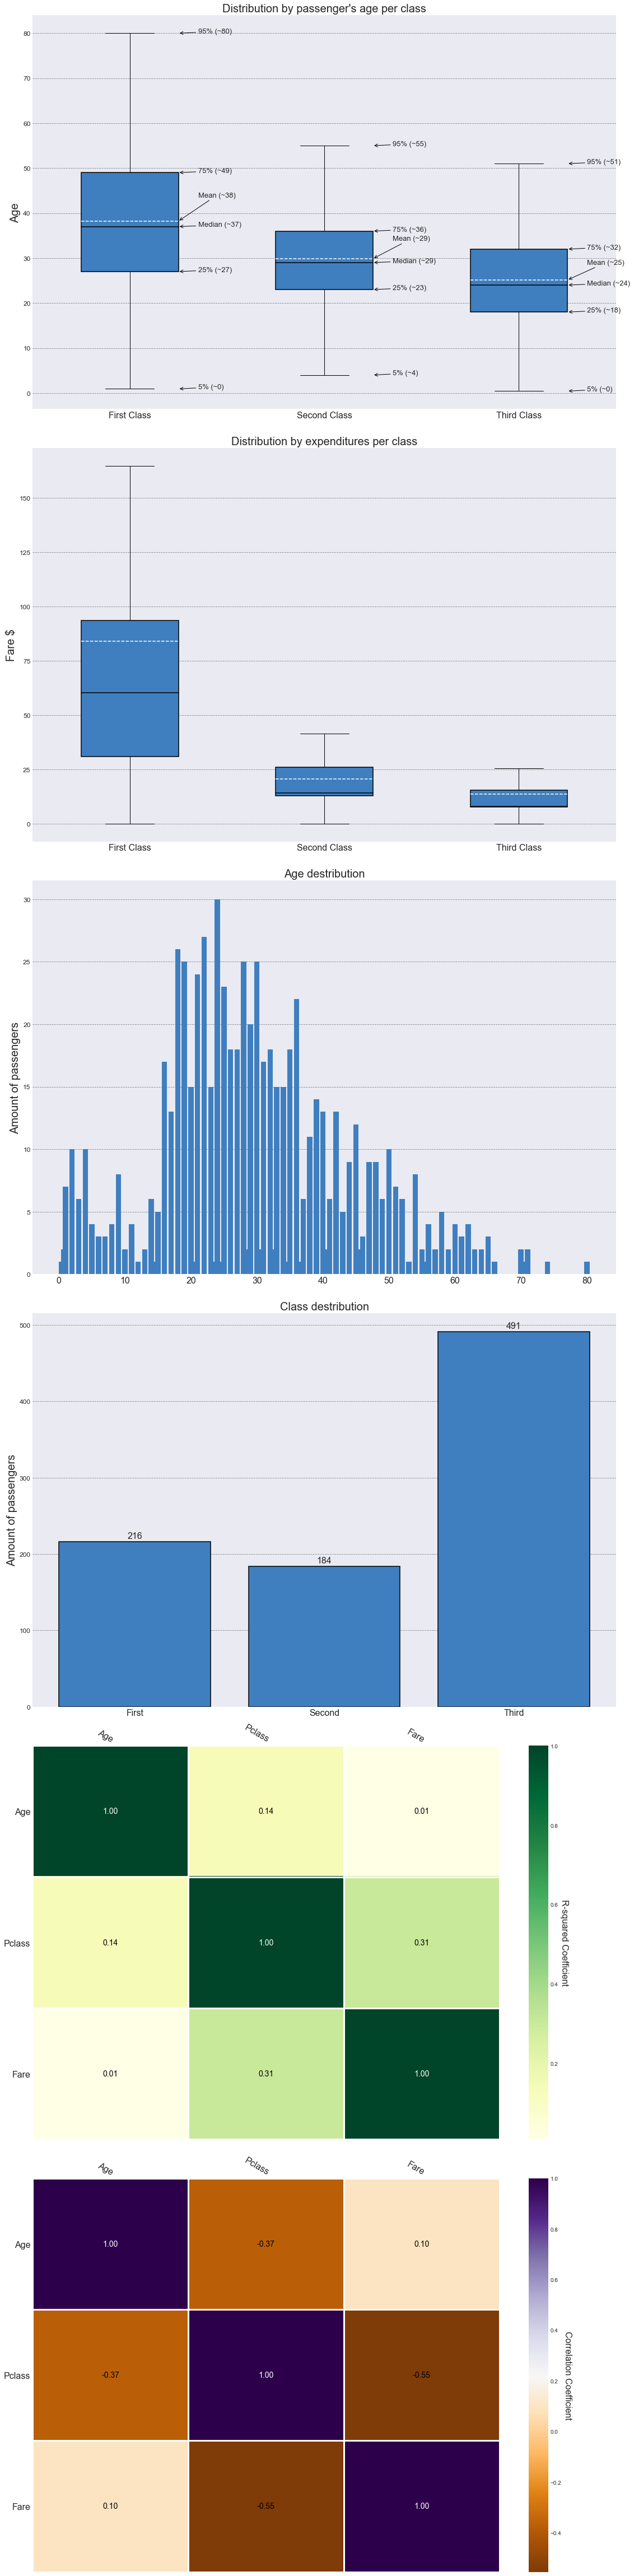

In [175]:
# I'd like to see the data which we certainly know.
removed_nan_ages = data_train[data_train['Age'].isna() == False]

fig, axes = plt.subplots(6, 1, figsize=(16, 64))

# Take a look at the destribution of passengers's ages per class
boxplot(
    [
        removed_nan_ages.loc[removed_nan_ages.Pclass == 1]['Age'], 
        removed_nan_ages.loc[removed_nan_ages.Pclass == 2]['Age'], 
        removed_nan_ages.loc[removed_nan_ages.Pclass == 3]['Age']
    ], 
    ['First Class', 'Second Class', 'Third Class'],
    "Distribution by passenger's age per class",
    ax=axes[0], 
    showmeans=True,
    annotate=True,
    y_label='Age'
)

# Now let's glance at the destribution passengers's ages per range of fare
boxplot(
    [
        data_train[data_train['Pclass'] == 1]['Fare'], 
        data_train[data_train['Pclass'] == 2]['Fare'], 
        data_train[data_train['Pclass'] == 3]['Fare']
    ], 
    ['First Class', 'Second Class', 'Third Class'],
    "Distribution by expenditures per class",
    ax = axes[1],
    showmeans=True,
    y_label='Fare $'
)

ages_count = removed_nan_ages['Age'].value_counts()

barplot(
    ages_count.keys(),
    ages_count.values,
    'Age destribution',
    ax=axes[2],
    linewidth=0,
    y_label="Amount of passengers"
)

barplot(
    ['First', 'Second', 'Third'], 
    [len(data_train[data_train['Pclass'] == 1]), len(data_train[data_train['Pclass'] == 2]), len(data_train[data_train['Pclass'] == 3])],
    'Class destribution', 
    ax=axes[3], 
    linewidth=1.5,
    annotate=True,
    annotate_params=dict(fontsize=16),
    y_label="Amount of passengers"
)

# And let's check how does these three datas are correlate.
df = pd.concat([removed_nan_ages['Age'], removed_nan_ages['Pclass'], removed_nan_ages['Fare']], axis=1, keys=['Age', 'Pclass', 'Fare'])
corrplot(
    df,
    ax=axes[4],
    cbarlabel="R-squared Coefficient",
    text_kw=dict(fontsize=14),
    cmap="YlGn",
    aspect='auto',
    squared=True
)

corrplot(
    df,
    ax=axes[5],
    cbarlabel="Correlation Coefficient",
    text_kw=dict(fontsize=14),
    cmap="PuOr",
    aspect='auto',
)


# Adjust all incorporated plots, therefore titles fonts won't work.
fig.tight_layout()

<h3>Statistical Analysis</h3>

The base assumptions which we made from the exploration above are:
1. A class reflects a social class of a passenger.
2. The Fare doesn't explain the age
3. The class explains only the 1/7 of the age. Is it statistically significant?

<h4>A class reflects a social class of a passenger</h4>

The goal to show that each class has a really low probability to intercept to each other.
To show this I use the CLT ([Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)). In the each class we have some extraordinary passengers. For example, some passengers in the first class bought the cheapest (23 pounds) Cabin at the 'E'-Deck or someone did for 45 pounds but at the second class and so on.

First, split each dataset onto samples.
I used [this](https://www.surveymonkey.com/mp/sample-size-calculator/) calculator. If you would like so - you can use this formula:

![ssize](https://cdn.smassets.net/assets/cms/cc/uploads/mp-samplesize-formula.png)

Where

1. z - Z-score
2. e - Margin of Error (Than wider the margin of error then wider the CI)
3. p - sample proportion. If you're not certain regard the proportion assign it as 0.5. As you can see the p=0.5 the vastest sample.
    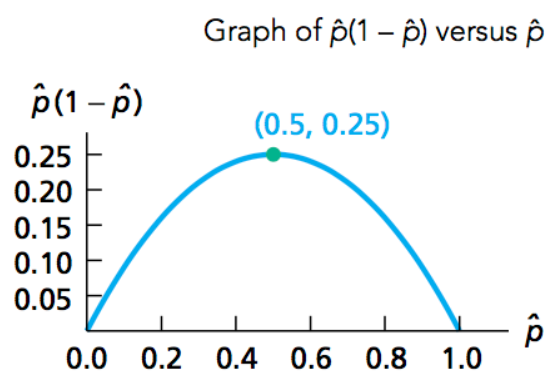
4. N - population size

The parameters, which I used: 


1. Margin of Error is 5%
2. z-score = 3, it means that I am 99.7% confident that a mean of a sample lies within CI $[\mu - 5; \mu + 5]$ or within $[\mu - 3\sigma; \mu + 3\sigma]$

In [176]:
def calculate_sample_size(N, e=0.05, ci=0.99, p=0.5):
    z = {
        0.99999: 4.42,
        0.9999: 3.89,
        0.999: 3.29,
        0.99: 2.58,
        0.98: 2.33,
        0.96: 2.05,
        0.95: 1.96,
        0.92: 1.75,
        0.85: 1.44,
        0.80: 1.28,
        0.75: 1.15,
        0.70: 1.04
    }
    return math.ceil(((z[ci]**2 * p * (1-p))/e**2)/(1+ ((z[ci]**2 * p * (1-p))/(e**2 * N))))

In [177]:
samples_means_first_class = []
samples_means_second_class = []
samples_means_third_class = []
for i in range(10000):
    samples_means_first_class.append(data_train[data_train.Pclass == 1]['Fare'].sample(n=calculate_sample_size(data_train[data_train.Pclass == 1].shape[0])).mean())
    samples_means_second_class.append(data_train[data_train.Pclass == 2]['Fare'].sample(n=calculate_sample_size(data_train[data_train.Pclass == 2].shape[0])).mean())
    samples_means_third_class.append(data_train[data_train.Pclass == 3]['Fare'].sample(n=calculate_sample_size(data_train[data_train.Pclass == 3].shape[0])).mean())

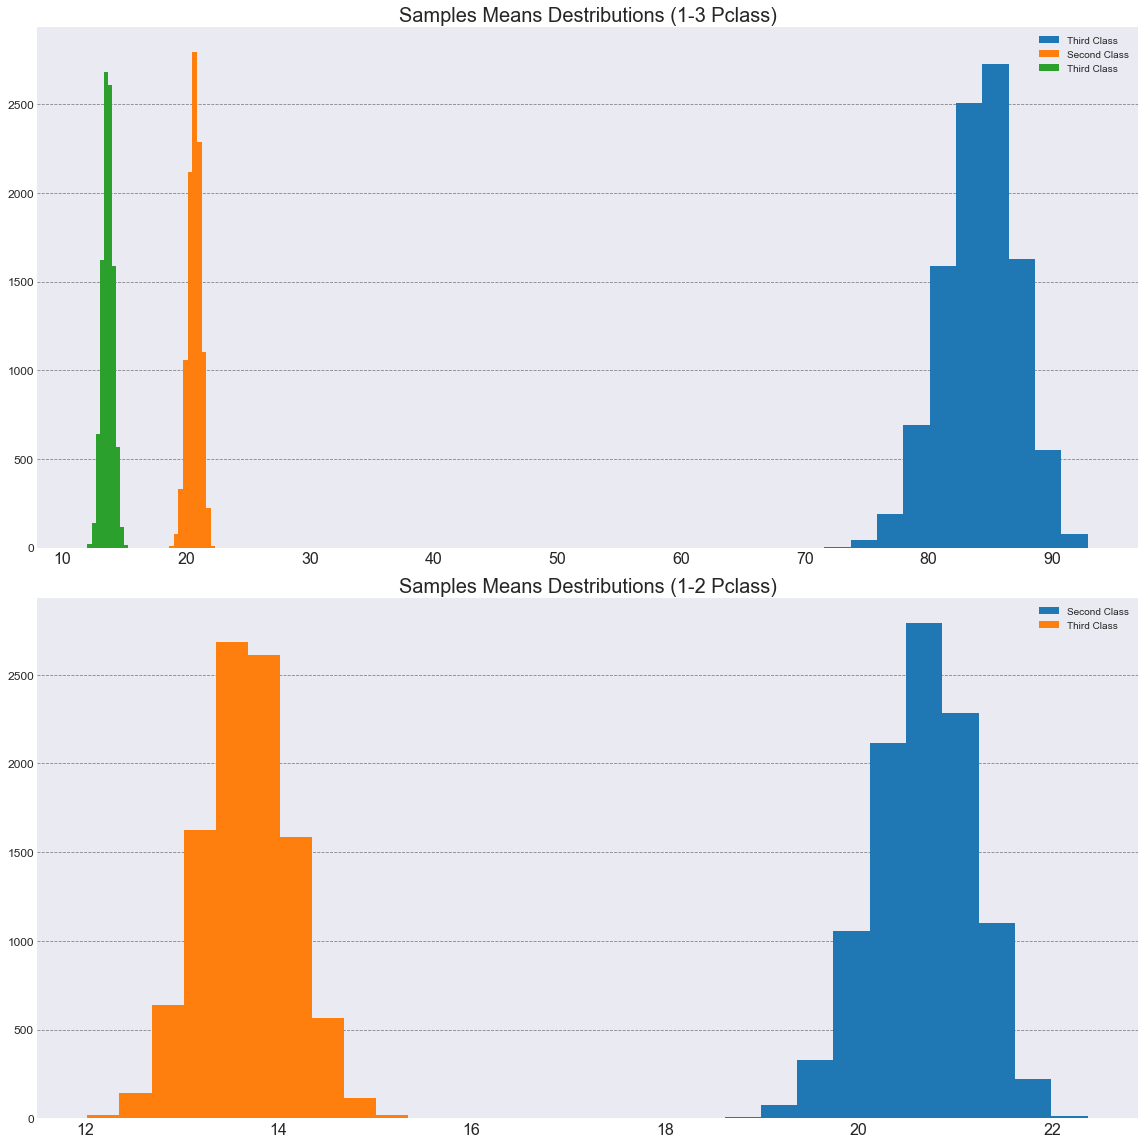

In [178]:
fig, ax = plt.subplots(2, 1, figsize=(16,16))
histplot(samples_means_first_class, "Samples Means Destributions (1-3 Pclass)", ax=ax[0], label="Third Class", legend=True)
histplot(samples_means_second_class, "Samples Means Destributions (1-3 Pclass)", ax=ax[0], label="Second Class", legend=True)
histplot(samples_means_third_class, "Samples Means Destributions (1-3 Pclass)", ax=ax[0], label="Third Class", legend=True)

histplot(samples_means_second_class, "Samples Means Destributions (1-2 Pclass)", ax=ax[1], label="Second Class", legend=True)
histplot(samples_means_third_class, "Samples Means Destributions (1-2 Pclass)", ax=ax[1], label="Third Class", legend=True)

fig.tight_layout()

We may see that the first class' means are far away from two remaining. The second and third class are much closer, However they have no intersection between each other. I supposed, that it will be demanded to conduct the statistical analysis, however it isn't. I thought so, because of charts of the Fare/PClass for the second and third class, destribution looked pretty similar and their means were pretty close. So according to the graphs above, we can say that the class' rank represents the social class of a passenger of this class.

***My assumption has been accepted. A passenger's class reflects a passenger's social class.*** 

<h4>The Fare doesn't influences somehow to the age</h4>

The next assumption was that the fare doesn't explain the age.

First, define the test-type.

1. **Statistical objective:** Classification (identifying)
2. **Data:** continuous data-type; 1 independent variable.
3. **Test:** linear regression (Simple).

$$
H_0: \text{the fare doesn't affect somehow to the age.}\  R^2 \approx 0.
$$

$$
H_a: \text{the fare does affect somehow to the age.}\  R^2 \gg 0.
$$

$$
\alpha = 0.05
$$
To prove or rebut this, fit a line and count the Coefficient of Determination.

 


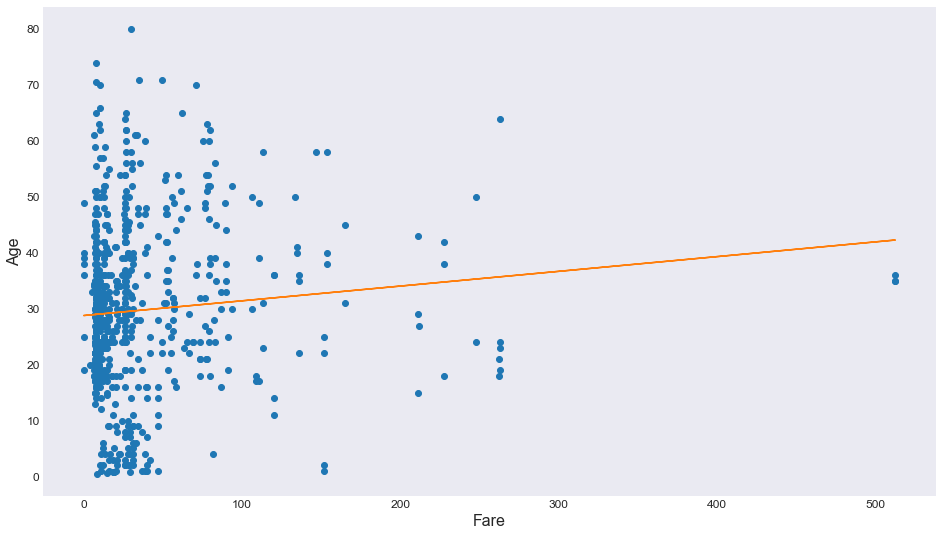

In [179]:
x = removed_nan_ages['Fare']
y = removed_nan_ages['Age']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.figure(figsize=(16,9))
plt.plot(x, y, 'o')
plt.plot(x, slope*x + intercept)
plt.ylabel('Age', fontsize=16)
plt.xlabel('Fare', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

print('\0')

There are two formulas of counting R-squared.

$$
R^2 = \frac{Var(mean) - Var(line)}{Var(mean)} = \frac{\sum_{i=1}^{i=n} {[y_i - \bar{y}]^2} - \sum_{i=1}^{i=n} {[y_i - slope]^2}}{\sum_{i=1}^{i=n} {[y_i - \bar{y}]^2}}
$$

or
$$
R^2 = correlation\ coefficient^2 = \left[ \frac{\sum_{i=1}^{i=n} {[(x - \bar{x}) \times (y - \bar{y})}]}{\sqrt{\sum_{i=1}^{i=n} {[x_i - \bar{x}]^2} \times \sum_{i=1}^{i=n} {[y_i - \bar{y}]^2}}} \right]^2
$$

In our case we got the $R^2 = 0.1\%$ and the statistical significance (likelihood) of this value is 1%. Therefore $H_0$ rejected.

In [180]:
r_value

0.09606669176903888

In [181]:
r_value**2

0.009228809267447523

In [182]:
p_value

0.010216277504447055

***The second assumption accepted too. The Fare explains 0.1% of the Age. However, the p-value is less than 0.05, therefore the $H_0$ (fare doesn't affect to the Age) is rejected, however p-value is really close to the 0.05 and the ratio of an effect is 0.1% so I  am sure it's not raliable feature for the age.***

<h4>The Pclass influences somehow to the Age and does significantly</h4>

And the last assumption that the Age depends on Pclass, somehow.

First, define the test-type.

1. **Statistical objective:** Classification (identifying)
2. **Data:** continuous data-type (the Pclass if formally discrete, but I set it as interval [1,3]); 1 independent variable.
3. **Test:** linear regression (Simple).

$$
H_0: \text{the passenger's class doesn't affect somehow to the age.}\  R^2 \approx 0.
$$

$$
H_a: \text{the passenger's class does affect somehow to the age.}\  R^2 \gg 0.
$$

$$
\alpha = 0.05
$$

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]),
 <a list of 11 Text yticklabel objects>)

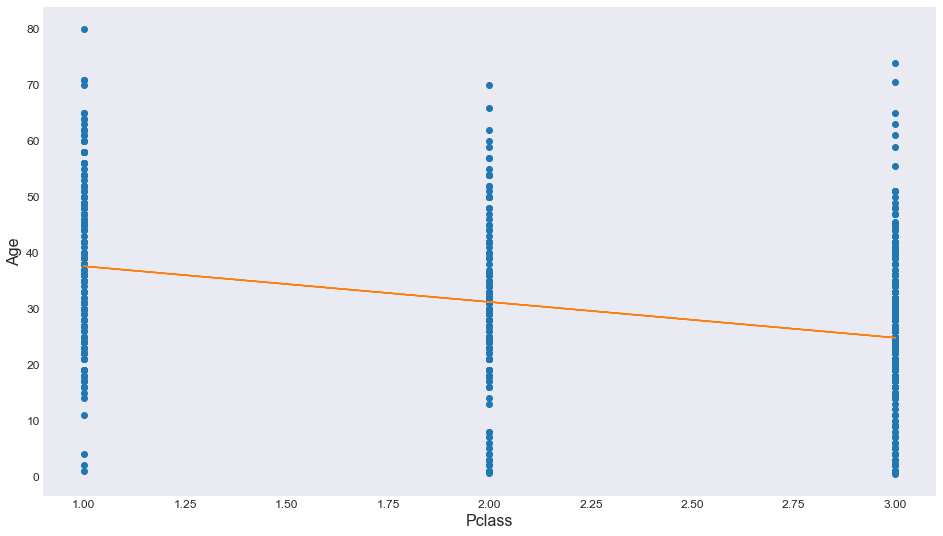

In [183]:
x = removed_nan_ages['Pclass']
y = removed_nan_ages['Age']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.figure(figsize=(16,9))
plt.plot(x, y, 'o')
plt.plot(x, slope*x + intercept)
plt.ylabel('Age', fontsize=16)
plt.xlabel('Pclass', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

$H_0$ has been rejected, therefore the Pclass affects to the Age and it is statistically significant.

In [184]:
r_value**2

0.1363278503857747

In [185]:
p_value

1.7566991549633413e-24

***The assumption has been partially rejected. The Pclass explains 14% of the Age, and statistically it is significant. But I guess that 14% is still really low ratio of effect, but it might be helpful if I won't find another (better) feature.***

<h3>Honorifics</h3>

As many others I've noticed the [honorifics](https://en.wikipedia.org/wiki/English_honorifics). "*In the English language, an honorific is a form of address indicating respect.*" We can split a name to the three parts: **[Last name, ]** **[Honorific. ]** **[First name]** and extract honorifics as I did so. I've decided to add the Honorifics as the feature to the dataset.

In [186]:
# Adding new feature (Honorific) to the data_train and data_test
data_train['Honorific'] = data_train['Name'].apply(lambda str: str.split(', ')[1].split('. ')[0].split(' ')[-1])
data_test['Honorific'] = data_test['Name'].apply(lambda str: str.split(', ')[1].split('. ')[0].split(' ')[-1])

Now the both datasets looks like:

In [187]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [188]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


Let's plot the Age per Honorific to see if there a dependencies among them.

As we may see below that the age somehow shifted, depends on the honorific. Therefore, the replacement by the mean in the each Honorific's subclass is more accurate than by the mean in the sex's (male/female) subclass or in the Pclass' subclass.

But, I added another method of the replacement (may be it's not the enhancement).
I assign each nan-age to the random value which lies within Confidence Interval  of the sample means, with Confidence Level 68%.

Let's note that the mean of the sample means is equal to the population mean.

$$
\mu_{mean} = \mu
$$

and the sample means standard deviation is equal to the population standard deviation devided by root square of the sample size.

$$
\sigma_{mean} = \frac{\sigma}{\sqrt{n}}
$$

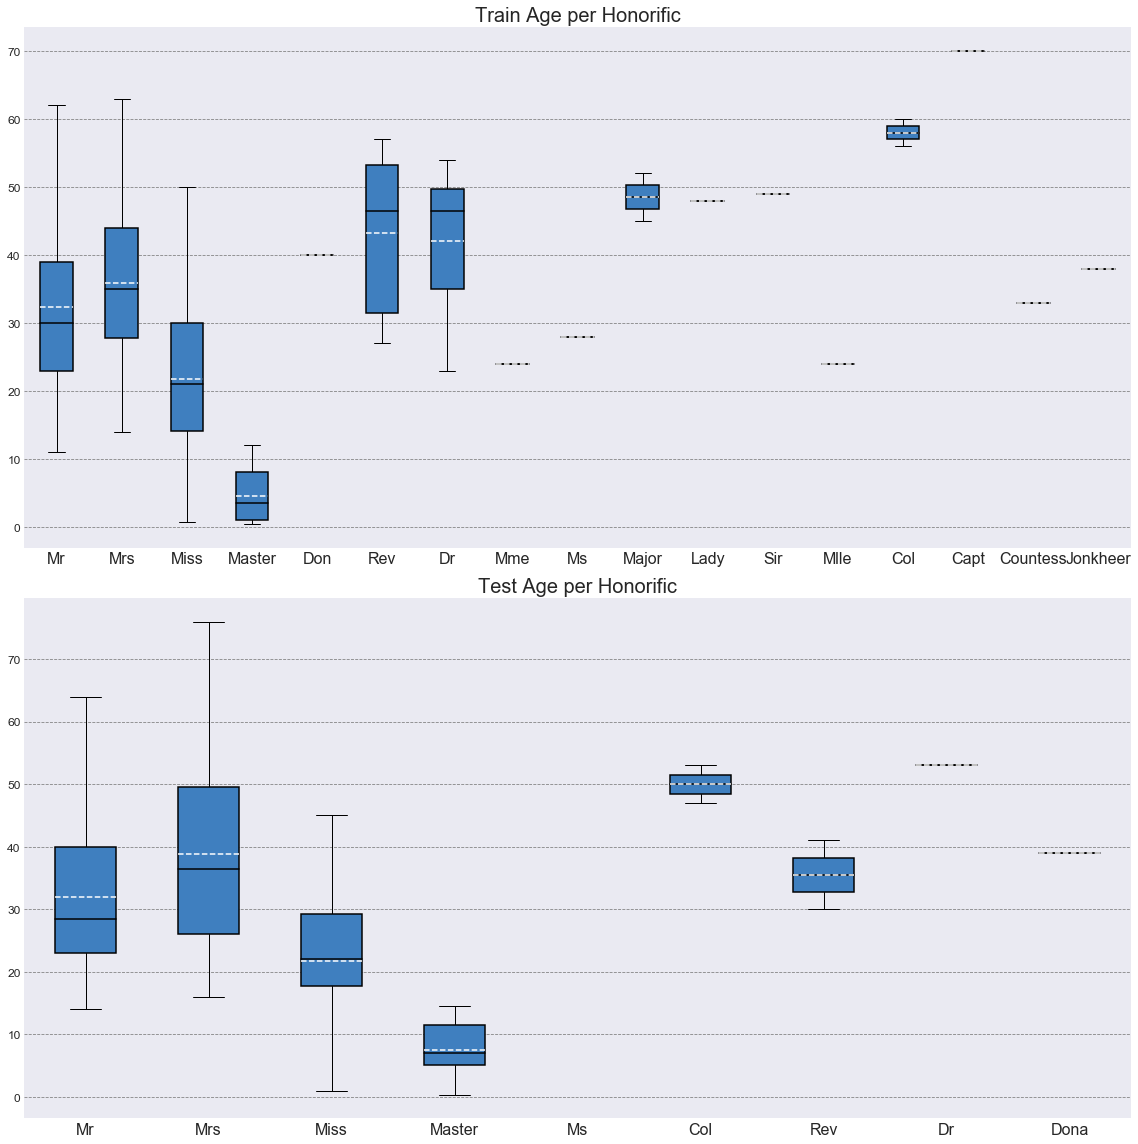

In [189]:
fig, axes = plt.subplots(2, 1, figsize=(16,16))

boxplot(
    [data_train[data_train.Honorific == i].loc[data_train.Age.isna() == False, 'Age'] for i in data_train['Honorific'].unique()],
    [i for i in data_train['Honorific'].unique()],
    "Train Age per Honorific",
    showmeans=True,
    ax=axes[0]
)

boxplot(
    [data_test[data_test.Honorific == i].loc[data_test.Age.isna() == False, 'Age'] for i in data_test['Honorific'].unique()],
    [i for i in data_test['Honorific'].unique()],
    "Test Age per Honorific",
    showmeans=True,
    ax=axes[1]
)
fig.tight_layout()

In [190]:
def honorific_stat_compound(entire_dataset, wo_null_dataset):
    """Compound the missing age' values per honorific.
    
    :param entire_dataset: the dataset
    :param wo_null_dataset: the dataset-slice, without null age.
    
    :return: dataframe with quantity values per honor, amount with missing-ages,
    Mean for the age per honor, sigma for age per honor
    """
    nans = {}
    means = {}
    stds = {}
    for honor in entire_dataset['Honorific'].unique():
        nans.update({honor: entire_dataset[entire_dataset.Honorific == honor]['Age'].isnull().sum()})
        means.update({honor: round(wo_null_dataset[wo_null_dataset.Honorific == honor]['Age'].mean(), 2)})
        stds.update({honor: round(wo_null_dataset[wo_null_dataset.Honorific == honor]['Age'].std(), 2)})
    return pd.concat(
        [
            entire_dataset['Honorific'].value_counts(), 
            pd.Series(nans),
            pd.Series(means),
            pd.Series(stds)
        ], axis=1, keys=['Amount', 'Missing', 'Mean', 'Sigma'])

According to the plot we maight assume that the difference between training and test data is barely seen.

In [191]:
honorific_stat_compound(data_train, data_train[data_train.Age.isna() == False])

,Amount,Missing,Mean,Sigma
Mr,517,119,32.37,12.71
Miss,182,36,21.77,12.99
Mrs,125,17,35.90,11.43
Master,40,4,4.57,3.62
Dr,7,1,42.00,12.02
Rev,6,0,43.17,13.14
Mlle,2,0,24.00,0.00
Major,2,0,48.50,4.95
Col,2,0,58.00,2.83
Lady,1,0,48.00,NaN


In [192]:
honorific_stat_compound(data_test, data_test[data_test.Age.isna() == False])

,Amount,Missing,Mean,Sigma
Mr,240,57,32.00,11.80
Miss,78,14,21.77,10.46
Mrs,72,10,38.90,15.03
Master,21,4,7.41,4.67
Col,2,0,50.00,4.24
Rev,2,0,35.50,7.78
Dr,1,0,53.00,NaN
Ms,1,1,NaN,NaN
Dona,1,0,39.00,NaN


In [193]:
def statistic_honor(dataset):
    """The function returns statistic measurments.
    
    :param dataset: a dataset
    :return: dicts of means, sample's sizes, mean's standard deviation, and a dataframe of stats
    """
    # Here stores the means for missed age per honorifics
    means = {}
    
    # the sample sizes pere honorifics calculated by formula above
    sample_size = {}
    
    honor_stat = honorific_stat_compound(dataset, dataset[dataset.Age.isna() == False])
    
    # Stores the means and sample sizes
    for honor, mean, size in zip(honor_stat.index, 
                                  honor_stat['Mean'],
                                  honor_stat['Amount']):
        means.update({honor: mean})
        sample_size.update({honor: calculate_sample_size(size)})
    
    # All nans in the Sigma related to the fact we have the only value (hence fill it as 0.0)
    honor_stat['Sigma'] = honor_stat['Sigma'].fillna(0.0)
    
    # Here sotores the sigma/sqrt(sample size) or sigma of means
    mean_sigma = {}
    for honor in means.keys():
        mean_sigma.update({honor: honor_stat['Sigma'][honor]/math.sqrt(sample_size[honor])})
    
    return means, sample_size, mean_sigma, honor_stat

Due to the [randit](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) uses the uniform probability density function

$$
f(x) = \begin{cases} \frac{1}{b - a}, & x \in [a,b] \\ 0, & x \notin [a,b] \end{cases}
$$

i.e. there is equal chances for each value for both datasets within a CI. I'd like to define the better CI.

And fo these purposes I have to know the Z-score our test-dataset to our train-dataset, in purpose to aware are they differs a lot. And know what exactly CI I required. To estimate z-score for each one use the formula:

$$
Z = \frac{\mu_{test} - \mu_{train}}{\frac{\sigma_{train}}{\sqrt{n}}}
$$

In [194]:
def z_score_test_train(train, test):
    res = []
    tr_stat = honorific_stat_compound(train, train[train.Age.isna() == False])
    ts_stat = honorific_stat_compound(test, test[test.Age.isna() == False])
    for honor in ts_stat.index:
        if honor in tr_stat['Mean'] and not np.isnan(ts_stat['Mean'][honor]) and not np.isnan(tr_stat['Sigma'][honor]):
            res.append((ts_stat['Mean'][honor] - tr_stat['Mean'][honor])/(tr_stat['Sigma'][honor]/math.sqrt(calculate_sample_size(tr_stat['Amount'][honor]))))

    return sum(res)/len(res)

In [195]:
z_score_test_train(data_train, data_test)

0.576499793442064

Z = 0.57. We can say that 1 standard deviation is enough to encompasses both datasets.

In [196]:
for dataset in [data_train, data_test]:
    means, _, mean_sigma, _ = statistic_honor(data_train)
    for honor, std in mean_sigma.items():
        if dataset[dataset.Honorific == honor]["Age"].isnull().sum() > 0:
            mean = means[honor]
            null_num = dataset[dataset.Honorific == honor]["Age"].isnull().sum()
            rand_age = np.random.randint((mean - std), (mean + std), size = null_num) if (mean-std) < (mean + std) else mean
            age_slice = dataset[dataset.Honorific == honor]["Age"].copy()
            age_slice[np.isnan(age_slice)] = rand_age
            dataset.loc[dataset.Honorific == honor, 'Age'] = dataset[dataset.Honorific == honor]["Age"].fillna(age_slice)        

In [197]:
honorific_stat_compound(data_train, data_train[data_train.Age.isna()==False])

,Amount,Missing,Mean,Sigma
Mr,517,0,32.16,11.16
Miss,182,0,21.53,11.64
Mrs,125,0,35.79,10.63
Master,40,0,4.47,3.45
Dr,7,0,41.57,11.03
Rev,6,0,43.17,13.14
Mlle,2,0,24.00,0.00
Major,2,0,48.50,4.95
Col,2,0,58.00,2.83
Lady,1,0,48.00,NaN


In [198]:
honorific_stat_compound(data_test, data_test[data_test.Age.isna()==False])

,Amount,Missing,Mean,Sigma
Mr,240,0,31.76,10.31
Miss,78,0,21.55,9.47
Mrs,72,0,38.31,14.02
Master,21,0,6.71,4.43
Col,2,0,50.00,4.24
Rev,2,0,35.50,7.78
Dr,1,0,53.00,NaN
Ms,1,0,28.00,NaN
Dona,1,0,39.00,NaN


In [199]:
data_train['Age'].isnull().sum()

0

In [200]:
data_test['Age'].isnull().sum()

0

In [201]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.560236,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.291036,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [202]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,29.888756,0.447368,0.392344,35.627188
std,120.810458,0.841838,13.037928,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Finally we solved the Age-NaN:) If you compare the mean and std of the Age current dataset and the [base dataset](#Extract-the-data), you may notice that the difference is scanty (less than 1). Hence I suppose that the replacement has succeed.

<h3>Fare Zeros</h3>

If we take a look at the Fare which is  lower than 6 pounds we may see that these Fare is not reliable (except 4.0125, because the lowest cost for the 3'd class was 2 pounds, according to the RUS wikipedia). We might see that the ratio of 0-Fare in the training dataset is the 2% of the entire dataset. Therefore if we replace these Fare to the mean of a passenger's class, it won't hurt somehow the dataset.

In [203]:
data_train[data_train.Fare < 6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S,Mr
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S,Mr
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S,Mr
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,32.0,0,0,239853,0.0000,NaN,S,Mr
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,Mr
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C,Mr
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,31.0,0,0,239853,0.0000,NaN,S,Mr
466,467,0,2,"Campbell, Mr. William",male,31.0,0,0,239853,0.0000,NaN,S,Mr
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,31.0,0,0,239854,0.0000,NaN,S,Mr
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S,Mr


In [204]:
data_test[data_test.Fare < 3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,31.0,0,0,112051,0.0,NaN,S,Mr
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,Mr


As I said above the ratio of the 0-Fare to the entire dataset's shape is about 2%.

In [205]:
(data_train[data_train.Fare < 6].shape[0] - 1)/data_train.shape[0]

0.017957351290684626

Means of each class look like:

In [206]:
data_train.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Replace 0-Fare values in both datasets, with the mean value of the correspondent class

In [207]:
for dataset in [data_train, data_test]:

    m2 = dataset.Fare == 0
    
    avg = data_train.groupby('Pclass')['Fare'].mean()
    dataset.loc[m2, 'Fare'] = dataset.loc[m2, 'Pclass'].map(avg)
    
data_train.loc[data_train.PassengerId == 873, 'Fare'] = data_train[data_train.Pclass == 1]['Fare'].mean()

Check if replacement is done correctly.

In [208]:
data_train[data_train.Fare < 6]['Fare']

378    4.0125
Name: Fare, dtype: float64

In [209]:
data_test[data_test.Fare < 3]['Fare']

Series([], Name: Fare, dtype: float64)

In [210]:
data_train.groupby('Pclass')['Fare'].mean()

Pclass
1    86.478188
2    21.335950
3    13.786960
Name: Fare, dtype: float64

<h3>Cabin NaN</h3>

The problem is that in the **Cabin** column, virtually 80% is missing. However I've noticed some features in the Cabin column. 

In [211]:
data_train[data_train.Cabin.isna() == True].shape[0]/data_train.shape[0]

0.7710437710437711

1. **The first:** Each Cabin begins with a letter, which indicates a deck, for example A1234 says that a passenger's cabin was at the A deck.
2. **The second:** if the last digit of a number is odd then the Cabin placed at the port side of the liner, otherwise if even then at the starboard side.

However, as I said above this information doesn't matter, because we have only 1/5 of revealed data of entire dataset. Of course we may detect some dependencies, but the ratio is too little. Therefore I believe that it's not influence on model accuracy, somehow.

However, I've found out that on the body of the [Herbert Cave](https://www.encyclopedia-titanica.org/titanic-victim/herbert-cave.html) was found [partial listing of first class cabin accommodation](https://www.encyclopedia-titanica.org/cave-list.html). Therefore we may assume that the passengers with known number of Cabin which not belongs the first class have to be alive. However it will be observed [further](#Cabin-again). 

<h2>Data Analysis</h2>

Currently the training data looks like:

In [212]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


<h3>Base dependecies</h3>

First, let's take a look to the base distributions. And make some assumptions.

1. **First:** amount of died bigger than survived.
2. **Second:** males more than females
3. **Third:** passengers of third class more than 2 remains
4. **Forth:** most common age [18; 35]
5. **Fifth:** prevalent number of passengers didn't have Parent/Chiled/Siblings on the liner
6. **Sixth:** prevalent number of passengers siled away from Southampton
7. **Seventh:** prevalent number of passengers paid the lowest price (what explains the most of passengers were in the 3'd class)

At this step we could say that the main features of a model are the sex (The captain ordered that the women and children have to be saved first) and the Cabin (where it was located).

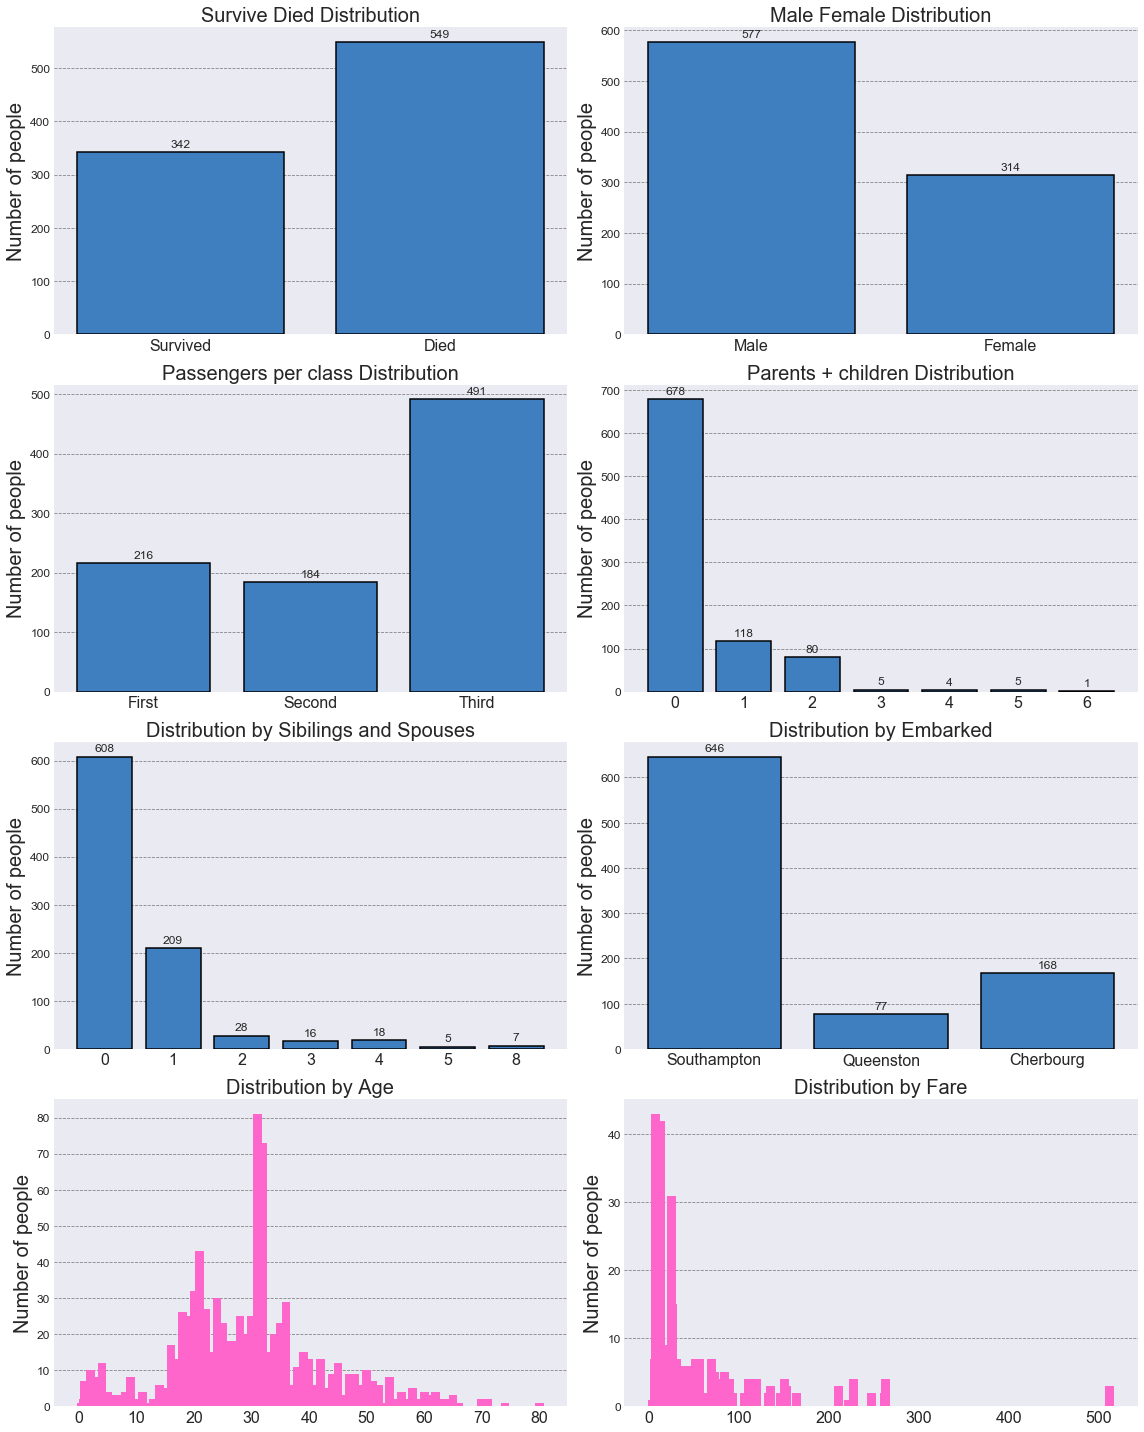

In [213]:
fig, axes = plt.subplots(4, 2, figsize=(16, 20))

barplot(
    ['Survived', 'Died'],
    [data_train[data_train.Survived == 1].shape[0], data_train[data_train.Survived == 0].shape[0]],
    "Survive Died Distribution",
    annotate=True,
    y_label='Number of people',
    ax=axes[0,0]
)

barplot(
    ['Male', 'Female'],
    [data_train[data_train.Sex == 'male'].shape[0], data_train[data_train.Sex == 'female'].shape[0]],
    "Male Female Distribution",
    annotate=True,
    y_label='Number of people',
    ax=axes[0,1]
)

barplot(
    ['First', 'Second', 'Third'],
    [
        data_train[data_train.Pclass == 1].shape[0], 
        data_train[data_train.Pclass == 2].shape[0],
        data_train[data_train.Pclass == 3].shape[0]
    ],
    "Passengers per class Distribution",
    annotate=True,
    y_label='Number of people',
    ax=axes[1,0]
)

barplot(
    [i for i in data_train['Parch'].unique()],
    [data_train[data_train.Parch == i].shape[0] for i in data_train['Parch'].unique()],
    "Parents + children Distribution",
    annotate=True,
    y_label='Number of people',
    ax=axes[1,1]
)

barplot(
    [str(i) for i in np.sort(data_train.SibSp.value_counts().keys())],
    [data_train[data_train.SibSp == i].shape[0] for i in np.sort(data_train.SibSp.value_counts().keys())],
    "Distribution by Sibilings and Spouses",
    y_label='Number of people',
    annotate=True,
    ax=axes[2,0]
)

barplot(
    ['Southampton', 'Queenston', 'Cherbourg'], 
    [
        data_train[data_train.Embarked == 'S'].shape[0],
        data_train[data_train.Embarked == 'Q'].shape[0],
        data_train[data_train.Embarked == 'C'].shape[0]

    ],
    "Distribution by Embarked",
    y_label='Number of people',
    annotate=True,
    ax=axes[2,1]
)

barplot(
    data_train['Age'].value_counts().keys(),
    data_train['Age'].value_counts().values,
    "Distribution by Age",
    y_label='Number of people',
    ax=axes[3,0],
    width=1.5,
    color=['#FF66CC'],
    linewidth=0
)

barplot(
    data_train['Fare'].value_counts().keys(),
    data_train['Fare'].value_counts().values,
    "Distribution by Fare",
    y_label='Number of people',
    ax=axes[3,1], 
    width=10,
    color=['#FF66CC'],
    linewidth=0
)

fig.tight_layout()

<h3>More complex dependencies</h3>

Let's contemplate what dependecies may be extracted. They may be hard to notice.

1. Ascertain whether a sex affects to the survival rate. **(It does)**
2. Does a class (Cabin location) affect to the survival rate. **(It does)**
3. Check if the age (as digit) affects to the survival rate. **(Seems like no, it doesn't)**

<h4>A sex is influencing on the survival chances</h4>

Check the assumption, that women have more chances to survive rather than mans. (Due to captain order)

***Assumption has confirmed. Women have higher survival rate.***

 


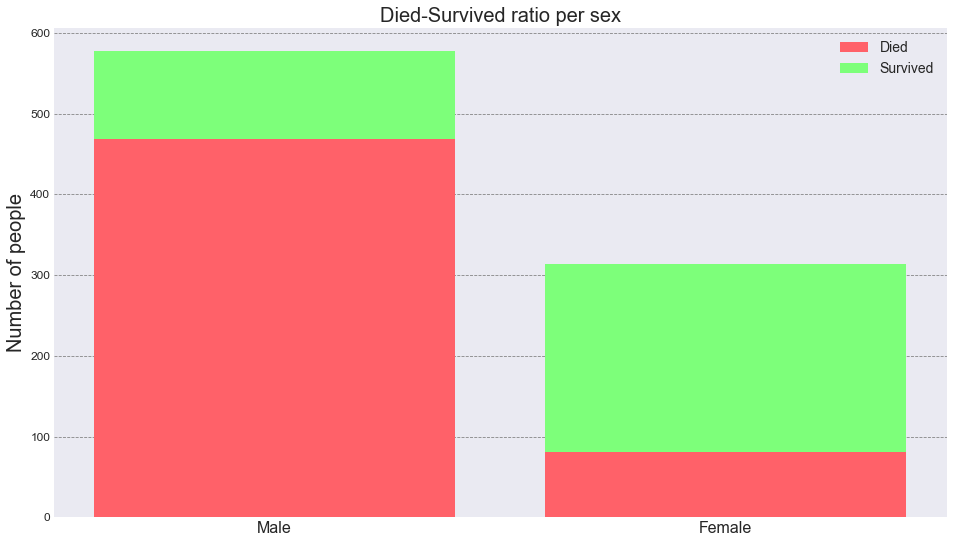

In [214]:
fig, axes = plt.subplots(1, 1, figsize=(16,9))

amount_died = [data_train[data_train.Sex == i].loc[data_train.Survived == 0].shape[0] for i in ['male', 'female']]

barplot(
    ['Male', 'Female'],
    amount_died,
    "Died-Survived ratio per sex",
    linewidth=0,
    color=['#ff6169'],
    y_label='Number of people',
    label='Died',
    legend=True,
    legend_params=dict(fontsize=14),
    ax=axes
)

barplot(
    ['Male', 'Female'],
    [data_train[data_train.Sex == i].loc[data_train.Survived == 1].shape[0] for i in ['male', 'female']],
    "Died-Survived ratio per sex",
    linewidth=0,
    color=['#7dff7a'],
    bottom=amount_died,
    y_label='Number of people',
    label='Survived',
    legend=True,
    legend_params=dict(fontsize=14),
    ax=axes
)

print('\0')

<h4>Than Higher class then higher chance to survive</h4>

Let's check the ratio of died to survived in each class.

***Along with the rank of class is rising, the ratio of survived passengers is increasing.***

<BarContainer object of 3 artists>

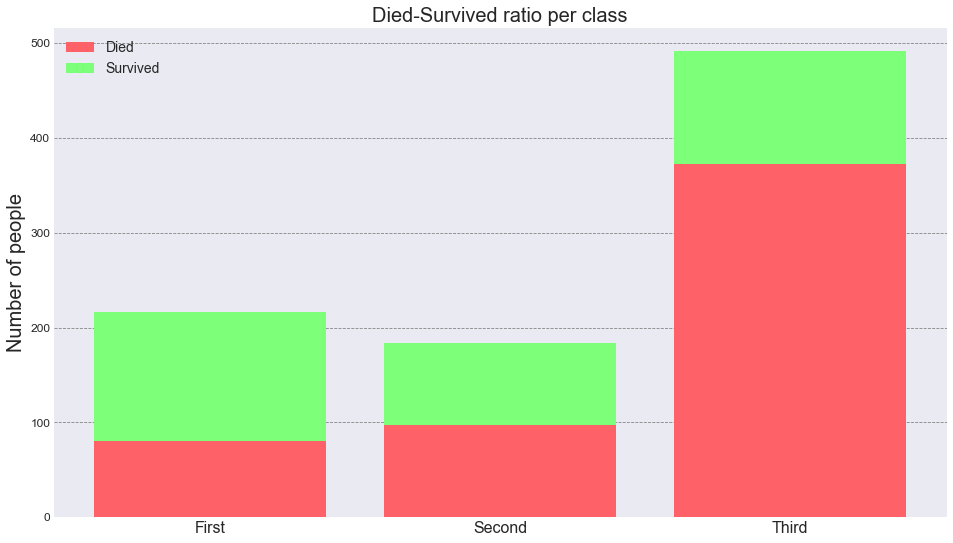

In [215]:
fig, axes = plt.subplots(1, 1, figsize=(16,9))

amount_died = [data_train[data_train.Pclass == i].loc[data_train.Survived == 0].shape[0] for i in range(1,4)]

barplot(
    ['First', 'Second', 'Third'],
    amount_died,
    "Died-Survived ratio per class",
    linewidth=0,
    color=['#ff6169'],
    y_label='Number of people',
    label='Died',
    legend=True,
    legend_params=dict(fontsize=14),
    ax=axes
)

barplot(
    ['First', 'Second', 'Third'],
    [data_train[data_train.Pclass == i].loc[data_train.Survived == 1].shape[0] for i in range(1,4)],
    "Died-Survived ratio per class",
    linewidth=0,
    color=['#7dff7a'],
    bottom=amount_died,
    y_label='Number of people',
    label='Survived',
    legend=True,
    legend_params=dict(fontsize=14),
    ax=axes
)

<h4>Younger have more chances to survive rather than maturer</h4> 

I supposed that if a human is younger he is stronger, hardier, etc. However the chart shows us that it doesn't really affect.

***The assumption that the age affects to survival rate is wrong. (When I say age I mean exactly age as a digit, not an age' group)*** 

 


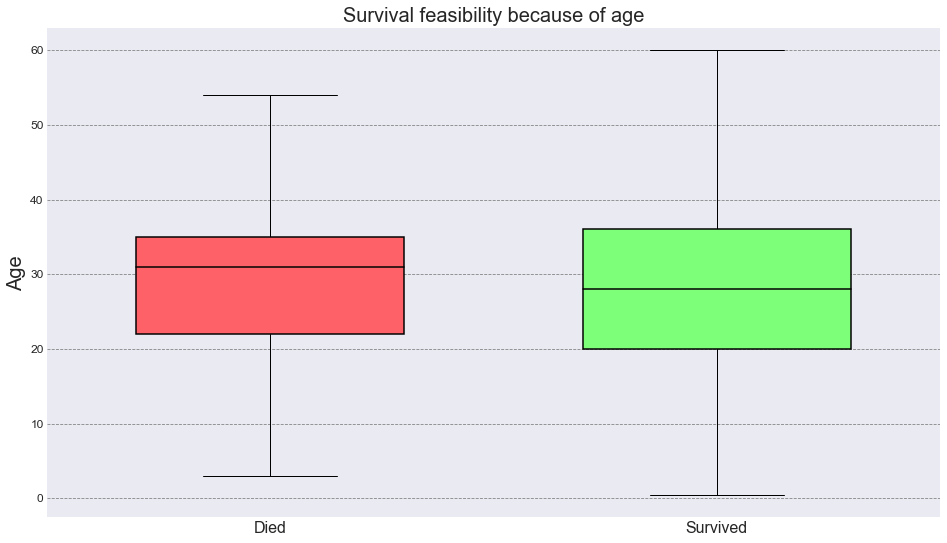

In [216]:
plt.figure(figsize=(16,9))
boxplot(
    [
        data_train[data_train.Survived == 0]['Age'],
        data_train[data_train.Survived == 1]['Age']
    ],
    ['Died', 'Survived'],
    "Survival feasibility because of age",
    widths=0.6,
    y_label="Age",
    additional_styles=dict(colorsdict=['#ff6169', '#7dff7a'])
)

print('\0')

<h4>Embarked affects to the survival</h4>

First chart shows that there are some dependecies between survival rate and embarked spot. However, as I gues it depends on class and the second chart clearly shows us that my assumption is proper.

 


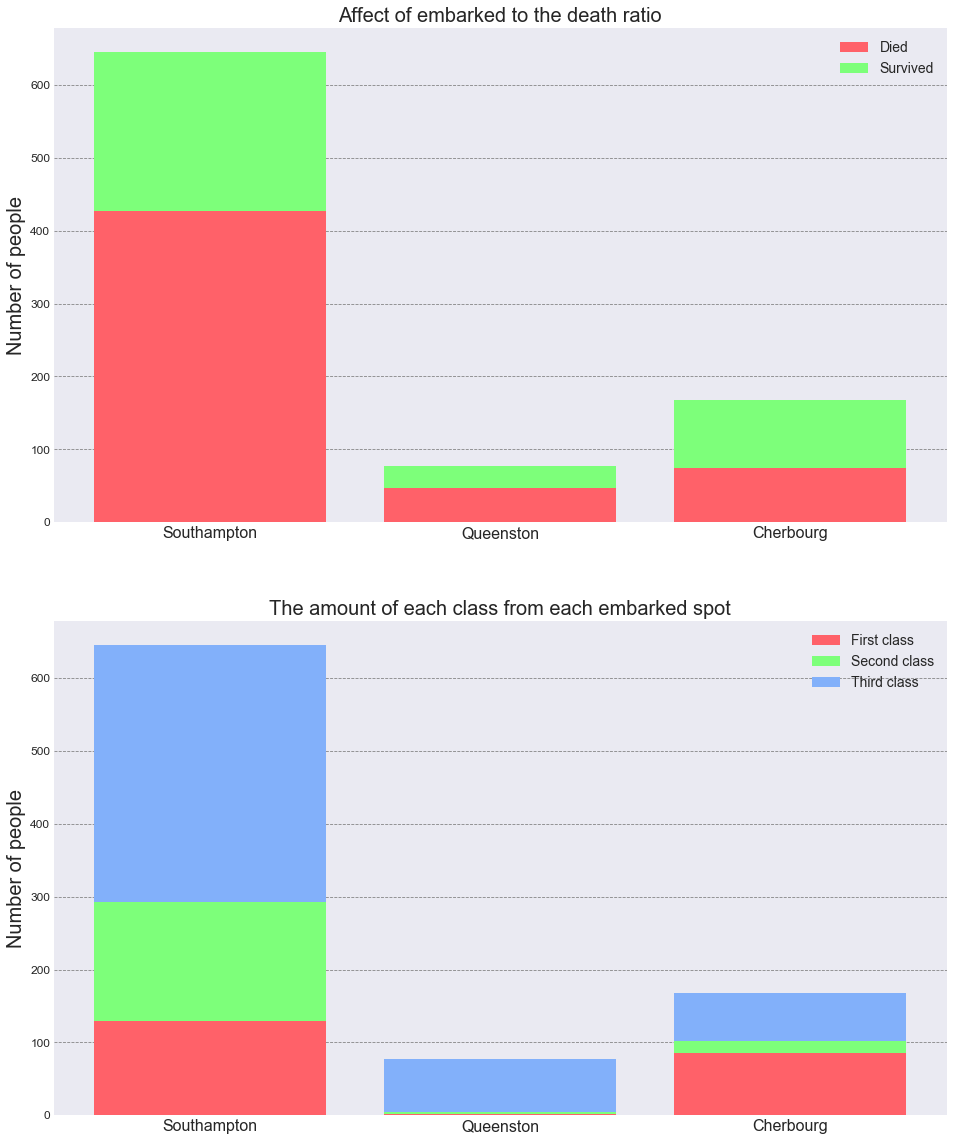

In [217]:
fig, axes = plt.subplots(2, 1, figsize=(16,20))
barplot(
    ['Southampton', 'Queenston', 'Cherbourg'], 
    [
        data_train[data_train.Survived == 0].loc[data_train.Embarked == 'S'].shape[0],
        data_train[data_train.Survived == 0].loc[data_train.Embarked == 'Q'].shape[0],
        data_train[data_train.Survived == 0].loc[data_train.Embarked == 'C'].shape[0]

    ],
    "Affect of embarked to the death ratio",
    y_label='Number of people',
    color=['#ff6169'],
    label='Died',
    legend=True,
    legend_params=dict(fontsize=14),
    ax=axes[0],
    linewidth=0
)

barplot(
    ['Southampton', 'Queenston', 'Cherbourg'], 
    [
        data_train[data_train.Survived == 1].loc[data_train.Embarked == 'S'].shape[0],
        data_train[data_train.Survived == 1].loc[data_train.Embarked == 'Q'].shape[0],
        data_train[data_train.Survived == 1].loc[data_train.Embarked == 'C'].shape[0]

    ],
    "Affect of embarked to the death ratio",
    y_label='Number of people',
    color=['#7dff7a'],
    label='Survived',
    legend=True,
    legend_params=dict(fontsize=14),
    ax=axes[0],
    bottom =
    [
        data_train[data_train.Survived == 0].loc[data_train.Embarked == 'S'].shape[0],
        data_train[data_train.Survived == 0].loc[data_train.Embarked == 'Q'].shape[0],
        data_train[data_train.Survived == 0].loc[data_train.Embarked == 'C'].shape[0]

    ],
    linewidth=0
)

barplot(
    ['Southampton', 'Queenston', 'Cherbourg'], 
    [
        data_train[data_train.Pclass == 1].loc[data_train.Embarked == 'S'].shape[0],
        data_train[data_train.Pclass == 1].loc[data_train.Embarked == 'Q'].shape[0],
        data_train[data_train.Pclass == 1].loc[data_train.Embarked == 'C'].shape[0]

    ],
    "The amount of each class from each embarked spot",
    y_label='Number of people',
    color=['#ff6169'],
    label='First class',
    legend=True,
    legend_params=dict(fontsize=14),
    ax=axes[1],
    linewidth=0
)

barplot(
    ['Southampton', 'Queenston', 'Cherbourg'], 
    [
        data_train[data_train.Pclass == 2].loc[data_train.Embarked == 'S'].shape[0],
        data_train[data_train.Pclass == 2].loc[data_train.Embarked == 'Q'].shape[0],
        data_train[data_train.Pclass == 2].loc[data_train.Embarked == 'C'].shape[0]

    ],
    "The amount of each class from each embarked spot",
    y_label='Number of people',
    color=['#7dff7a'],
    label='Second class',
    legend=True,
    legend_params=dict(fontsize=14),
    bottom=
    [
        data_train[data_train.Pclass == 1].loc[data_train.Embarked == 'S'].shape[0],
        data_train[data_train.Pclass == 1].loc[data_train.Embarked == 'Q'].shape[0],
        data_train[data_train.Pclass == 1].loc[data_train.Embarked == 'C'].shape[0]

    ],
    ax=axes[1],
    linewidth=0
)

barplot(
    ['Southampton', 'Queenston', 'Cherbourg'], 
    [
        data_train[data_train.Pclass == 3].loc[data_train.Embarked == 'S'].shape[0],
        data_train[data_train.Pclass == 3].loc[data_train.Embarked == 'Q'].shape[0],
        data_train[data_train.Pclass == 3].loc[data_train.Embarked == 'C'].shape[0]

    ],
    "The amount of each class from each embarked spot",
    y_label='Number of people',
    color=['#82b0fa'],
    label='Third class',
    legend=True,
    legend_params=dict(fontsize=14),
    ax=axes[1],
    bottom=
    [
        data_train[data_train.Pclass == 2].loc[data_train.Embarked == 'S'].shape[0] + data_train[data_train.Pclass == 1].loc[data_train.Embarked == 'S'].shape[0],
        data_train[data_train.Pclass == 2].loc[data_train.Embarked == 'Q'].shape[0] + data_train[data_train.Pclass == 1].loc[data_train.Embarked == 'Q'].shape[0],
        data_train[data_train.Pclass == 2].loc[data_train.Embarked == 'C'].shape[0] + data_train[data_train.Pclass == 1].loc[data_train.Embarked == 'C'].shape[0]

    ],
    linewidth=0
)
print('\0')

<h4>Arbitrary Correlation Matrix</h4>

Let's take a brake and look at the correlation between the current features.

Summarize, the current assumption:

1. Our previous assumption, regard the [passenger's class](#Than-Higher-class-then-higher-chance-to-survive) (than higher a class then higher a chance to survive) and the [sex](#A-sex-is-influencing-on-the-survival-chances) (women have higher chances to survive, because of captain order) are confirmed.

2. The age, siblings and parent/child relationship make sheer low effect tot the survival rate.

3. We may noticed that Pclass really close connected to the fare (ha-ha, could  it be otherwise?), than higher class (3->1) then higher cost and vise versa. 

4. It seems like fare and embarked features do some effect, but I believe it is, due to the Pclass (embarked prove is [above](#Embarked-affects-to-the-survival)). From the sections above, we can ascertain that Pclass affects on survival rate (higher class - higher chances to survive) [1] and that the Pclass depends on fare (than higher fare then higher class' rank) [3]. By combining these two claims we might assume that than higher fare then higher chances to survive (exactly what the chart shows). This issue we will explore [further](#Honorifics-analysis)

5. Honorific, is pretty interesting feature, according to the chart the correlation between honorific and survival rate is negative (than higher honorific then lower chance to survive). However we get this $r$ coefficient with this arrangement of honorifics:

     * 0: 'Capt'
     * 1: 'Col'
     * 2: 'Countess'
     * 3: 'Don'
     * 4: 'Dr'
     * 5: 'Jonkheer'
     * 6: 'Lady'
     * 7: 'Major'
     * 8: 'Master'
     * 9: 'Miss'
     * 10: 'Mlle'
     * 11: 'Mme'
     * 12: 'Mr'
     * 13: 'Mrs'
     * 14: 'Ms'
     * 15: 'Rev'
     * 16: 'Sir'
   
   if we will swap the order then the coefficient become another. I soppuse we need to split this Honorifics onto the more common and discrete by each other groups. Also honorifics affects to the Age, but the issue how much it does still the same.
   
6. The assumption that the Age affects to the class rank is also true (on 30%), than maturer a passenger then higher rank of a class he can afford.

We may emphasize another dependencies, but I do not see a reason to write them down.

Due to the dataframe has non-numerical data, we need to convert it. I will drop the **PassengerId**, **Name**, **Ticket**, **Cabin** from the temporary dataset, because the do not affect directly (explicitly) to the model's accuracy.

In [218]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Honorific       object
dtype: object

In [219]:
def categorical_to_numeric(dataset, drop=None):
    temp_df = dataset.copy()
    
    if drop:
        temp_df = temp_df.drop(drop, axis=1)
    
    for i in temp_df.select_dtypes(['object']).columns:
        temp_df[i] = temp_df[i].astype('category')
    
    cat_columns = temp_df.select_dtypes(['category']).columns

    
    source_relates = {}
    for i in cat_columns:
        source_relates.update({i: dict(enumerate(temp_df[i].cat.categories ))})
    
    temp_df[cat_columns] = temp_df[cat_columns].apply(lambda x: x.cat.codes)
    
    
    return temp_df, source_relates

 


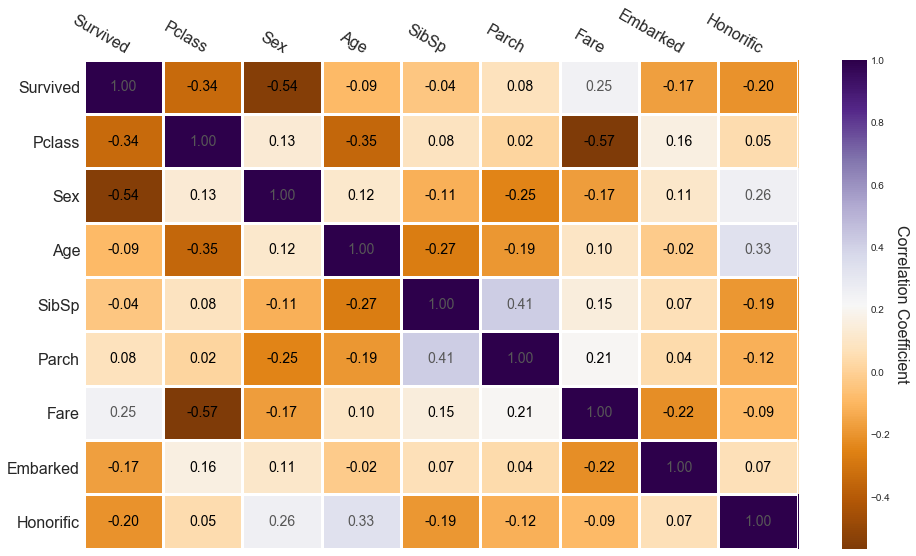

In [220]:
#(data, title="", ax=None, cbar_kw={}, cbarlabel="", squared=False, text_kw={}, valfmt="{x:.2f}", **kwargs):
fig, axes = plt.subplots(1, 1, figsize=(16,9))

temp_df, rels = categorical_to_numeric(data_train, drop=['PassengerId', 'Name', 'Ticket', 'Cabin'])

corrplot(
    temp_df,
    cbarlabel="Correlation Coefficient",
    text_kw=dict(fontsize=14, textcolors=['black', '#575757']),
    cmap="PuOr",
    aspect='auto',
    ax=axes
)

print('\0')

In [221]:
rels

{'Sex': {0: 'female', 1: 'male'},
 'Embarked': {0: 'C', 1: 'Q', 2: 'S'},
 'Honorific': {0: 'Capt',
  1: 'Col',
  2: 'Countess',
  3: 'Don',
  4: 'Dr',
  5: 'Jonkheer',
  6: 'Lady',
  7: 'Major',
  8: 'Master',
  9: 'Miss',
  10: 'Mlle',
  11: 'Mme',
  12: 'Mr',
  13: 'Mrs',
  14: 'Ms',
  15: 'Rev',
  16: 'Sir'}}

<h4>Honorifics analysis</h4>

As I said before there are too many honorifics, and I believe it is required to split them onto groups.

$$
\text{Nobility}-
\small
\begin{cases}
\textbf{Capt} - \text{Captain} \\
\textbf{Col (Colonel}) - \text{is a senior military officer rank below the general officer ranks.} \\
\textbf{Don} -  \text{master or owner.} \\
\textbf{Dr} - \text{for the holder of a doctoral degree (e.g. PhD, DPhil, MD, or DO in many countries)} \\
\textbf{Jonkheer} - \text{is an honorific in the Low Countries denoting the lowest rank within the nobility.} \\
\textbf{Lady} - \text{term of respect for a girl or woman, the equivalent of gentleman.} \\
\textbf{Major} - \text{is a military rank of commissioned officer status, with corresponding ranks existing in many military forces throughout the world.} \\
\textbf{Countess} - \text{for female peers with the rank of baroness.} \\
 \textbf{Rev (Reverend)} - \text{most often placed before the names of Christian clergy and ministers.} \\
\textbf{Sir} - \text{address for men, derived from Sire in the High Middle Ages.} \\
\textbf{Dona} - \text{Feminine form for don (honorific).} \\ 
\end{cases}
$$

$$
\text{Mrs} - 
\begin{cases}
\textbf{Mrs} - \text{for married women who do not have another professional or academic title, an abbreviation of Mistress.}\\
\textbf{Ms} -  \text{for women, regardless of marital status or when marital status is unknown.}\\
\end{cases}
$$

$$
\text{Miss} - 
\begin{cases}
\textbf{Mlle (Mademoiselle)} - \text{is a traditional alternative for an unmarried woman.} \\
\textbf{Mme (Madame)} - \text{is a polite and formal form of address for women.} \\
\textbf{Miss} - \text{for girls, unmarried women and (in the UK) married women who continue to use their maiden name.} \\
\end{cases}
$$

$$
\text{Master} - 
\begin{cases}
\textbf{Master} - \text{for boys and young men, or as a style for the heir to a Scottish peerage.} \\
\end{cases}
$$

$$
\text{Mr} - 
\begin{cases}
\textbf{Mr} - \text{for men, regardless of marital status, who do not have another professional or academic title.} \\
\end{cases}
$$


 


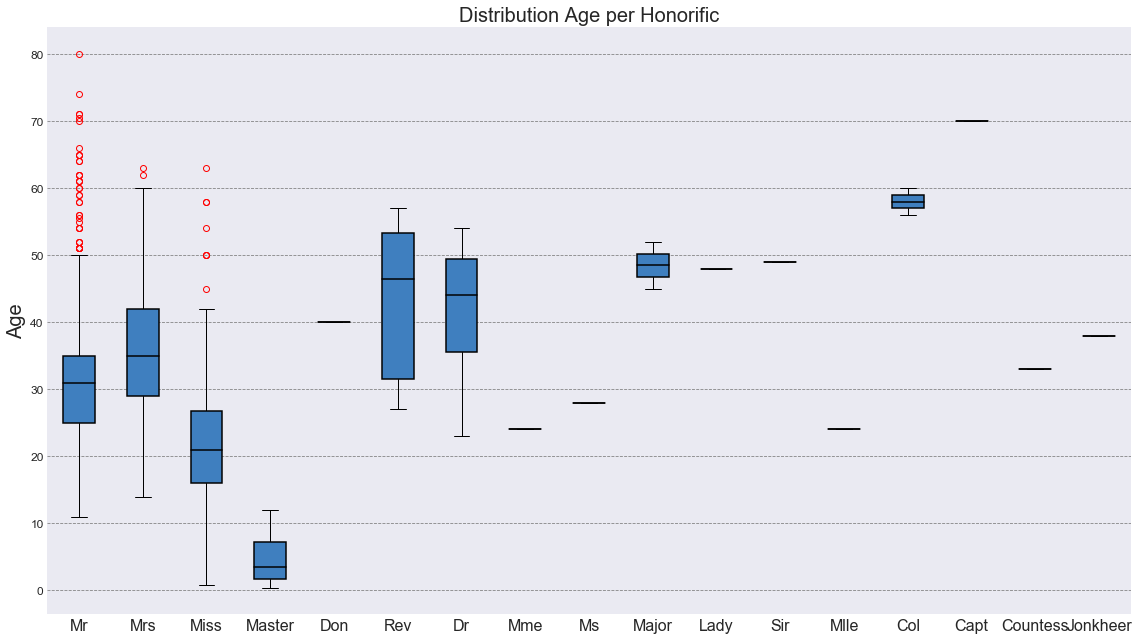

In [222]:
plt.figure(figsize=(16,9))
boxplot(
    [data_train.loc[data_train.Honorific == i, 'Age'] for i in data_train['Honorific'].unique()],
    [i for i in data_train['Honorific'].unique()],
    "Distribution Age per Honorific",
    showfliers=True,
    sym='o',
    y_label="Age"
)
plt.tight_layout()
print('\0')

In [223]:
subclasses = {
  'Capt': 'Nobility',
  'Col': 'Nobility',
  'Countess': 'Nobility',
  'Don': 'Nobility',
  'Dr': 'Nobility',
  'Jonkheer': 'Nobility',
  'Lady': 'Nobility',
  'Major': 'Nobility',
  'Rev': 'Nobility',
  'Sir': 'Nobility',
  'Dona': 'Nobility',
  'Master': 'Master',
  'Miss': 'Miss',
  'Mlle': 'Miss',
  'Mme': 'Miss',
  'Mr': 'Mr',
  'Mrs': 'Mrs',
  'Ms': 'Mrs',
}

data_train['HonCl'] = data_train['Honorific'].apply(lambda x: subclasses[x])
data_test['HonCl'] = data_test['Honorific'].apply(lambda x: subclasses[x])

In [224]:
data_test.HonCl.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Nobility'], dtype=object)

In [225]:
data_train.HonCl.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Nobility'], dtype=object)

Now it looks more self-representing.

 


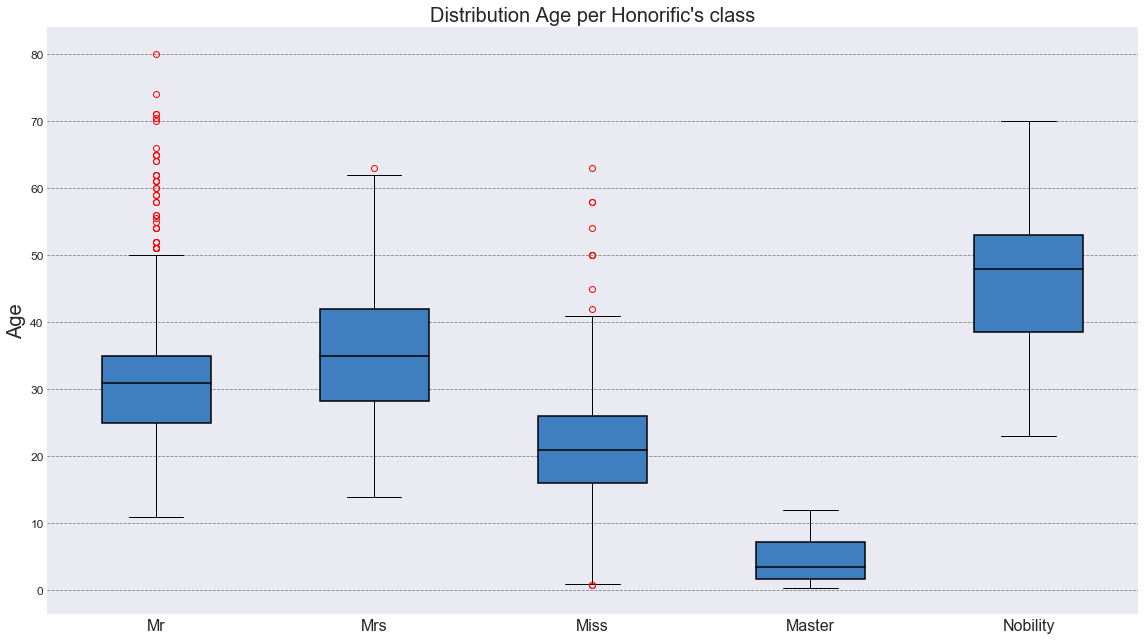

In [226]:
plt.figure(figsize=(16,9))
boxplot(
    [data_train.loc[data_train.HonCl == i, 'Age'] for i in data_train['HonCl'].unique()],
    [i for i in data_train['HonCl'].unique()],
    "Distribution Age per Honorific's class",
    showfliers=True,
    sym='o',
    y_label="Age"
)
plt.tight_layout()
print('\0')

I wanna to turn in a new parameter **"survival rate"** which represents a ratio of survived in a specific group.

In [227]:
def survival_rate(data):
    return data[data.Survived == 1].shape[0]/data.shape[0]

From the chart below we grasp that the lowest survival rate at the mans. Women and children have higher chances to survive. 

 


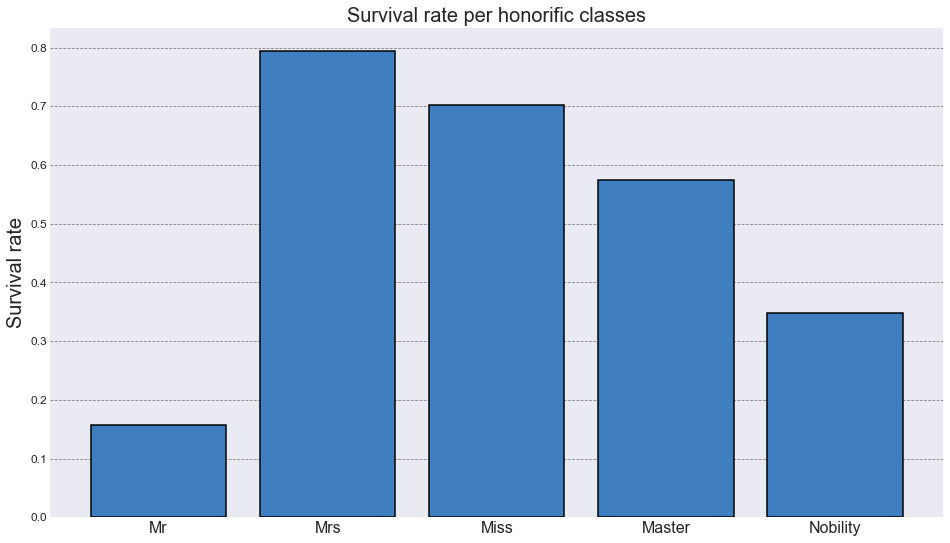

In [228]:
plt.figure(figsize=(16,9))
barplot(
    [i for i in data_train.HonCl.unique()],
    [survival_rate(data_train[data_train.HonCl == i]) for i in data_train.HonCl.unique()],
    "Survival rate per honorific classes",
    y_label="Survival rate"
)
print('\0')

<h4>Distribution died and alive per sex and class</h4>

Women, as we said many times before, have much higher chances to survive rather than mans. And in the 3'd class died women much more than in the 2'd and 1'st. The amount of died mans is much bigger than survived, however the difference between classes is scanty.  

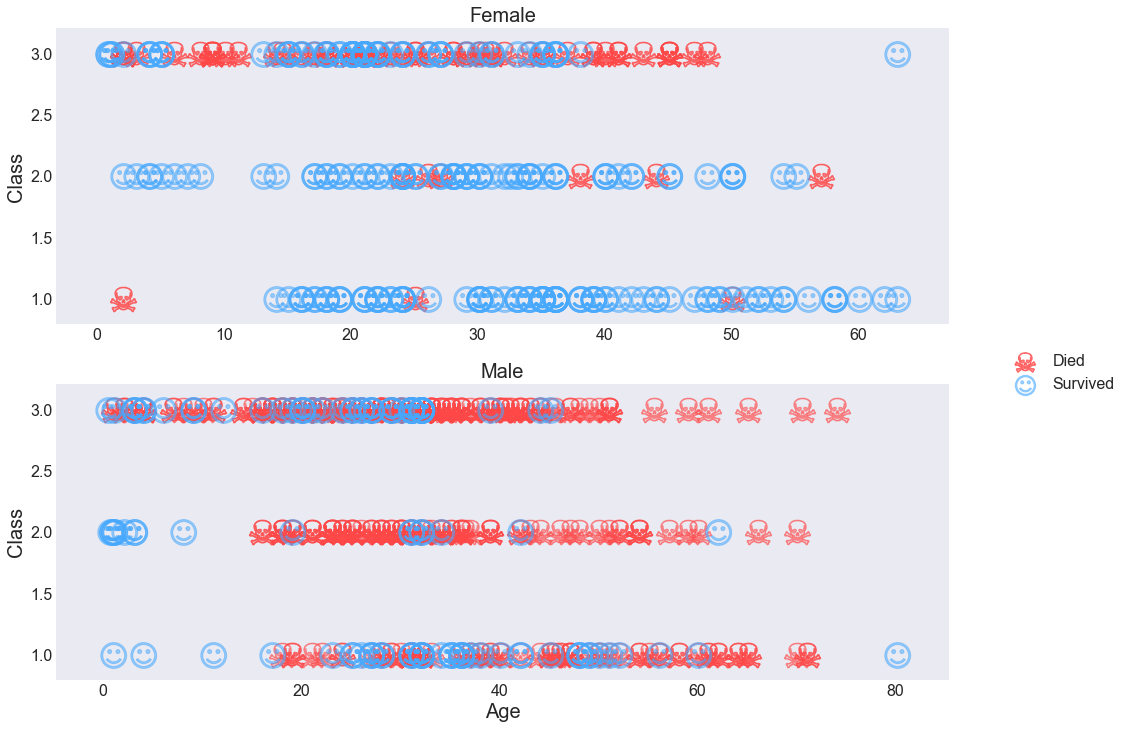

In [229]:
fig, axes = plt.subplots(2,1, figsize=(16,12))

axes[0].scatter(
    data_train.loc[data_train.Sex == 'female'].loc[data_train.Survived == 0, 'Age'], 
    data_train.loc[data_train.Sex == 'female'].loc[data_train.Survived == 0, 'Pclass'], 
    c="#ff4747", 
    s=800, 
    alpha=0.7, 
    marker='$\u2620$',
    label="Died"
)

axes[0].scatter(
    data_train.loc[data_train.Sex == 'female'].loc[data_train.Survived == 1, 'Age'], 
    data_train.loc[data_train.Sex == 'female'].loc[data_train.Survived == 1, 'Pclass'], 
    c="#47a9ff", 
    s=800, 
    alpha=0.5, 
    marker='$\u263A$',
    label="Survived"
)

axes[1].scatter(
    data_train.loc[data_train.Sex == 'male'].loc[data_train.Survived == 0, 'Age'], 
    data_train.loc[data_train.Sex == 'male'].loc[data_train.Survived == 0, 'Pclass'], 
    c="#ff4747", 
    s=800, 
    alpha=0.5, 
    marker='$\u2620$',
    label="Died"
)

axes[1].scatter(
    data_train.loc[data_train.Sex == 'male'].loc[data_train.Survived == 1, 'Age'], 
    data_train.loc[data_train.Sex == 'male'].loc[data_train.Survived == 1, 'Pclass'], 
    c="#47a9ff", 
    s=800, 
    alpha=0.5, 
    marker='$\u263A$',
    label="Survived"
)

axes[1].set_ylabel("Class", fontsize=20)
axes[1].set_xlabel("Age", fontsize=20)
axes[1].set_title("Male", fontsize=20)
axes[1].tick_params(labelsize=16)

lgnd = axes[0].legend(bbox_to_anchor=(1.05, -0.05), loc='upper left', fontsize=16)
axes[0].set_ylabel("Class", fontsize=20)
axes[0].set_title("Female", fontsize=20)
axes[0].tick_params(labelsize=16)
lgnd.legendHandles[0]._sizes = [500]
lgnd.legendHandles[1]._sizes = [500]


<h4>Survival chances depends on family's presence</h4>

Than intense and vibrant color on the chart below then  more data at this point (x,y).

According to chart we may assume those passengers who have no parents/children and siblings have pretty equal chances to survive and die. Also those, who have a lot of children have much higher chances to die than survive.

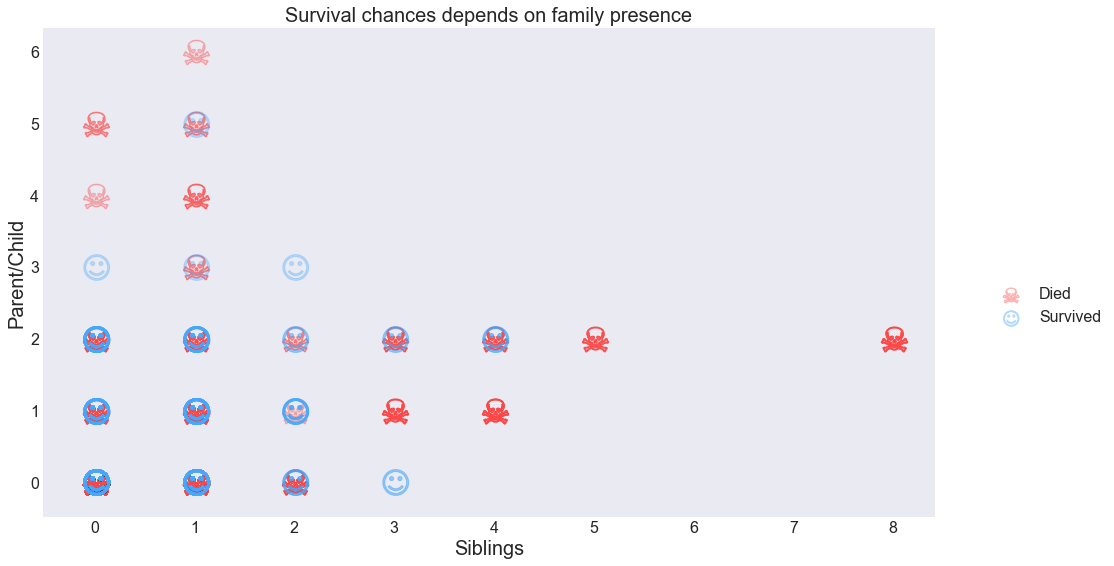

In [230]:
plt.figure(figsize=(16,9))

plt.scatter(
    data_train.loc[data_train.Survived == 0, 'SibSp'], 
    data_train.loc[data_train.Survived == 0, 'Parch'], 
    c="#ff4747", 
    s=800, 
    alpha=0.3, 
    marker='$\u2620$',
    label="Died"
)

plt.scatter(
    data_train.loc[data_train.Survived == 1, 'SibSp'], 
    data_train.loc[data_train.Survived == 1, 'Parch'], 
    c="#47a9ff", 
    s=800, 
    alpha=0.3, 
    marker='$\u263A$',
    label="Survived"
)

plt.ylabel("Parent/Child", fontsize=20)
plt.xlabel("Siblings", fontsize=20)
plt.title("Survival chances depends on family presence", fontsize=20)
lgnd = plt.legend(bbox_to_anchor=(1.05, 0.5), loc='upper left', fontsize=16)
lgnd.legendHandles[0]._sizes = [300]
lgnd.legendHandles[1]._sizes = [300]
plt.tick_params(labelsize=16)

<h4>Family feature</h4>

I wish to set the new parameter **Family** it includes the overall amount of relatives (Parent + children + brothers + sisters + husbands + wives + etc.). I'd like to determine some dependencies thro the Family's size.

Let's take a look at the portrayal of the family's effect to the survival rate. We might see that I've  wrong regarded the "equal chances" to survive/die for those who have no relatives (they survive in 30% of occurrences). Those who have 3 relatives have highest chances to survive. However we have to prove statistical significance of this values, because it's may be just an occasions, for instance, there are a few passengers with 3 relatives (and almost everybody survived), whereas those who have no relatives much prevail by their quantity.

Also we may say that the women with 0-3 relatives have the much higher chances to survive. But it is also required to prove the statical significance.

In [231]:
data_train['Family'] = data_train['Parch'] + data_train['SibSp']
data_test['Family'] = data_test['Parch'] + data_test['SibSp']

 


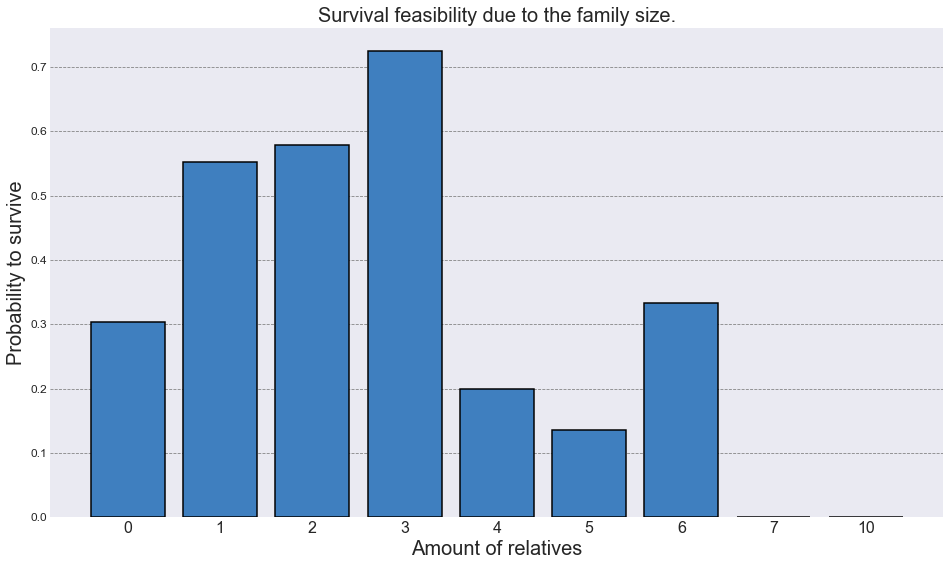

In [232]:
plt.figure(figsize=(16,9))

barplot(
    [str(i) for i in np.sort(data_train['Family'].unique())],
    [survival_rate(data_train[data_train.Family == i]) for i in np.sort(data_train['Family'].unique())],
    "Survival feasibility due to the family size.",
    y_label="Probability to survive",
    x_label="Amount of relatives"
)

print('\0')

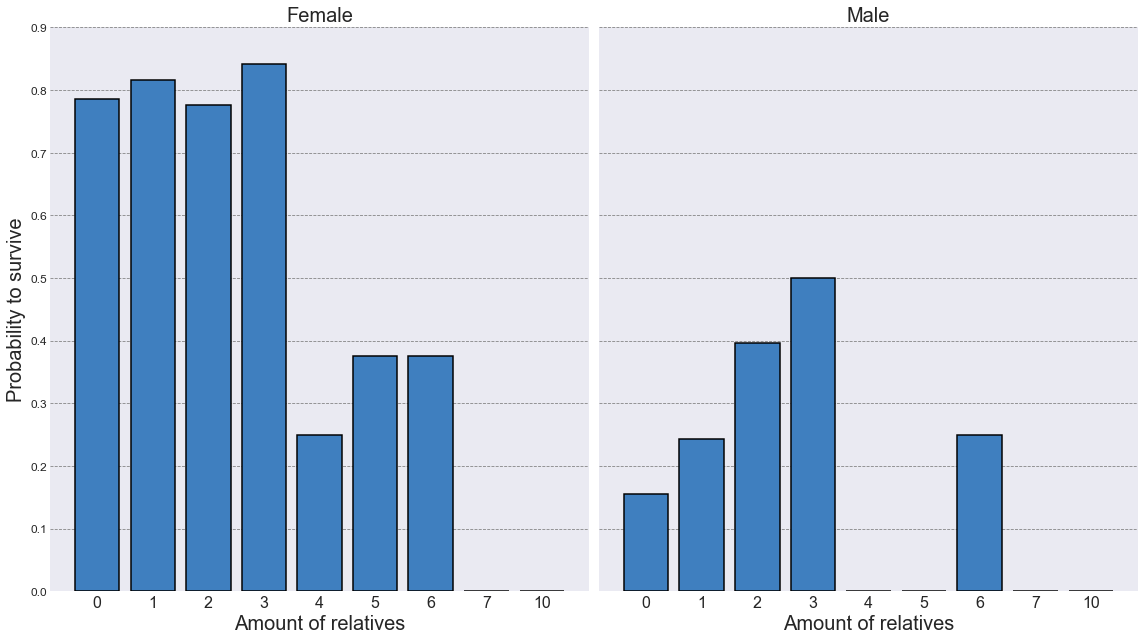

In [233]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))

barplot(
    [str(i) for i in np.sort(data_train['Family'].unique())],
    [survival_rate(data_train[data_train.Sex == 'female'].loc[data_train.Family == i]) for i in np.sort(data_train['Family'].unique())],
    "Female",
    y_label="Probability to survive",
    x_label="Amount of relatives",
    ax=axes[0],
    y_label_fontsize=10
)

barplot(
    [str(i) for i in np.sort(data_train['Family'].unique())],
    [survival_rate(data_train[data_train.Sex == 'male'].loc[data_train.Family == i]) for i in np.sort(data_train['Family'].unique())],
    "Male",
    x_label="Amount of relatives",
    ax=axes[1],
    y_label_fontsize=10
)

axes[0].yaxis.set_ticks(np.arange(0, 1, 0.1))
axes[1].yaxis.set_ticks(np.arange(0, 1, 0.1))
axes[1].yaxis.set_ticklabels([])
fig.tight_layout()

<h3>Statistical Analysis 2</h3>

Almost everywhere the Logistic Regression and Linear Regression are fitted. Therefore I used simple linear regression test instead of binary logistic regression test.

The base assumptions wich were established:

1. A honorific class affects to the survival
2. Family presence affects to the survival
3. Family presence at women affects to the survival

Note: I converted the data to numerical for the entire section.

In [234]:
temp_df, rels = categorical_to_numeric(data_train) 

<h4>A honorific class affects to the survival</h4>

We assumed that the honorific's class affects to the survival rate. It seems pretty logically, for instance the Nobility which have the higher rank of a class, according to the prove above have higher chances to survive. So, let's define hypothesis and test them:

$$
H_0 = \text{the honorific's class doesn't affect to the survival.}\ R^2 \approx 0
$$

$$
H_a = \text{the honorific's class does affect to the survival.}\ R^2 \gg 0
$$

$$
\alpha = 0.05
$$

 


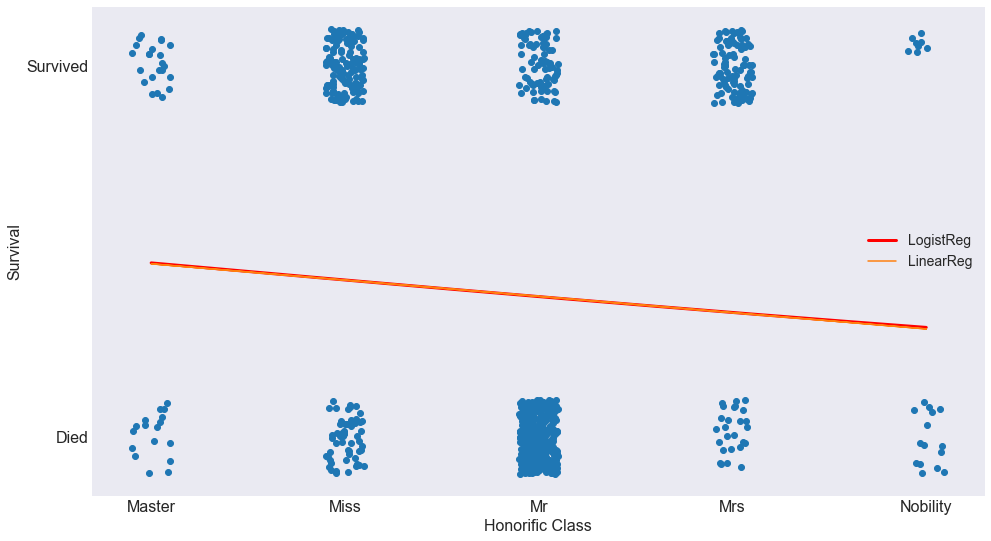

In [235]:
fig, axes = plt.subplots(1, 1, figsize=(16,9))
fig.canvas.draw()
x = temp_df['HonCl']
y = temp_df['Survived']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

clf = LogisticRegression(C=1e5)
clf.fit(x.values.reshape(-1,1), np.ravel(y.values.reshape(-1,1)))

X_test = np.linspace(x.min(), x.max(), 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
axes.plot(X_test, loss, color='red', linewidth=3, label="LogistReg")

# Did it for better comprehension of the chart
axes.plot(temp_df['HonCl'].apply(lambda x: np.random.uniform(x-0.1, x+0.1)), temp_df['Survived'].apply(lambda x: np.random.uniform(x-0.1, x+0.1)), 'o')
axes.plot(x, slope*x + intercept, label="LinearReg")
axes.set_ylabel('Survival', fontsize=16)
axes.set_xlabel('Honorific Class', fontsize=16)

labels_y = [item.get_text() for item in axes.get_yticklabels()]
labels_y = [''] * len(labels_y)
labels_y[1] = 'Died'
labels_y[-2] = 'Survived'
labels_x = [rels['HonCl'][i] for i in rels['HonCl']]
labels_x.insert(0, '')

axes.set_yticklabels(labels_y, fontsize=16)
axes.set_xticklabels(labels_x, fontsize=16)
axes.legend(fontsize=14)

print('\0')

According the correlation coefficient, we may say that the correlation is scanty, however it is. $R^2 \approx 0.005 = 0.5\%$ and $p-value < \alpha$ (0.03 < 0.05) it means that $H_0$ is rejected and the Honorific's class affects (affects 0.5%) to the Survival.

***The honorific's class affects to the survival (a little bit)***

In [236]:
np.exp(clf.coef_)

array([[0.82968638]])

In [237]:
r_value

-0.07117418372239617

In [238]:
r_value**2

0.005065764428549405

In [239]:
p_value

0.03365053476964329

<h4>Family presence affects to the survival</h4>

As I said formerly it might not influence somehow, because there may by only 4 passengers with 3 relatives and 3 of 4 are survived. Despite of this, there can be 100 woithout relatives, where only 30 survived. But I suppose it is important to check this out statistically.

$$
H_0 = \text{Family presence doesn't affect to the survival.}\ R^2 \approx 0
$$

$$
H_a = \text{Family presence does affect to the survival.}\ R^2 \gg 0
$$

$$
\alpha = 0.05
$$

 


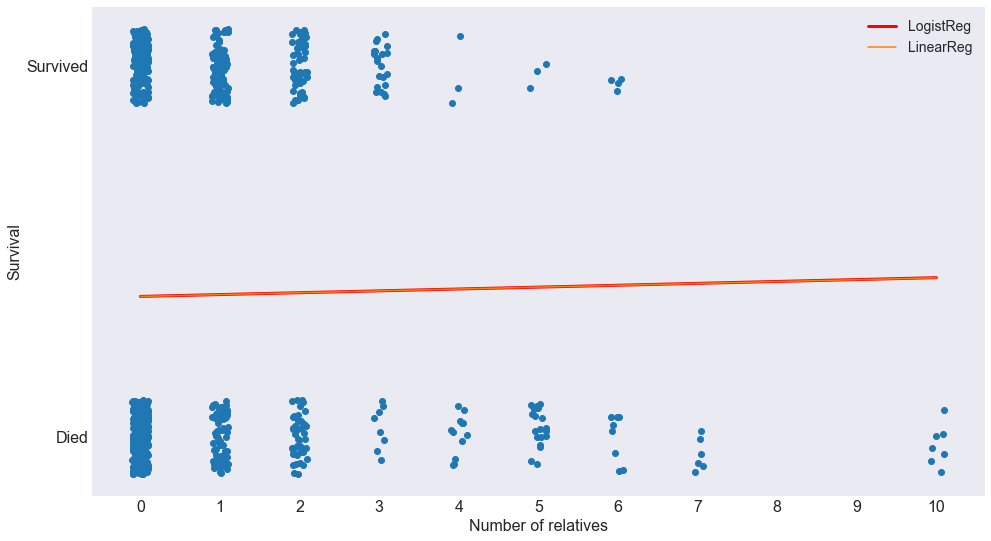

In [240]:
fig, axes = plt.subplots(1, 1, figsize=(16,9))
fig.canvas.draw()
temp_df = temp_df.sort_values(by=['Family'])
x = temp_df['Family']
y = temp_df['Survived']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

clf = LogisticRegression(C=1e5)
clf.fit(x.values.reshape(-1,1), np.ravel(y.values.reshape(-1,1)))

X_test = np.linspace(x.min(), x.max(), 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
axes.plot(X_test, loss, color='red', linewidth=3, label="LogistReg")

# Did it for better comprehension of the chart
axes.plot(
    temp_df['Family'].apply(lambda x: np.random.uniform(x-0.1, x+0.1)), 
    temp_df['Survived'].apply(lambda x: np.random.uniform(x-0.1, x+0.1)), 'o')
axes.plot(x, slope*x + intercept, label="LinearReg")
axes.set_ylabel('Survival', fontsize=16)
axes.set_xlabel('Number of relatives', fontsize=16)

labels_y = [item.get_text() for item in axes.get_yticklabels()]
labels_y = [''] * len(labels_y)
labels_y[1] = 'Died'
labels_y[-2] = 'Survived'
labels_x = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
axes.xaxis.set_ticks(np.arange(0, 11, 1))

axes.set_yticklabels(labels_y, fontsize=16)
axes.set_xticklabels(labels_x, fontsize=16)
axes.legend(fontsize=14)
print('\0')

Uhm, I suppose these values are pretty self-representing. However 0.61 > 0.05, and $R^2 \approx 0$, therefore we accept the $H_0$ and says that number of relatives doesn't affect to the survival.

***The number of relatives doesn't affect to the survival.***

In [241]:
np.exp(clf.coef_)

array([[1.02123622]])

In [242]:
r_value

0.016638989282745213

In [243]:
r_value**2

0.00027685596435131

In [244]:
p_value

0.6198911221343038

<h4>Family presence at women affects to the survival</h4>

According to the chart above we can see that the women with [0,3] kins have much higher chances to survive than those ones who have 4 and more. Let's prove that this factor affects to the survival.

$$
H_0 = \text{Women's kins prsence doesn't affect to the survival.}\ R^2 \approx 0
$$

$$
H_a = \text{Women's kins prsence does affect to the survival.}\ R^2 \gg 0
$$

$$
\alpha = 0.05
$$

In [245]:
rels['Sex']

{0: 'female', 1: 'male'}

 


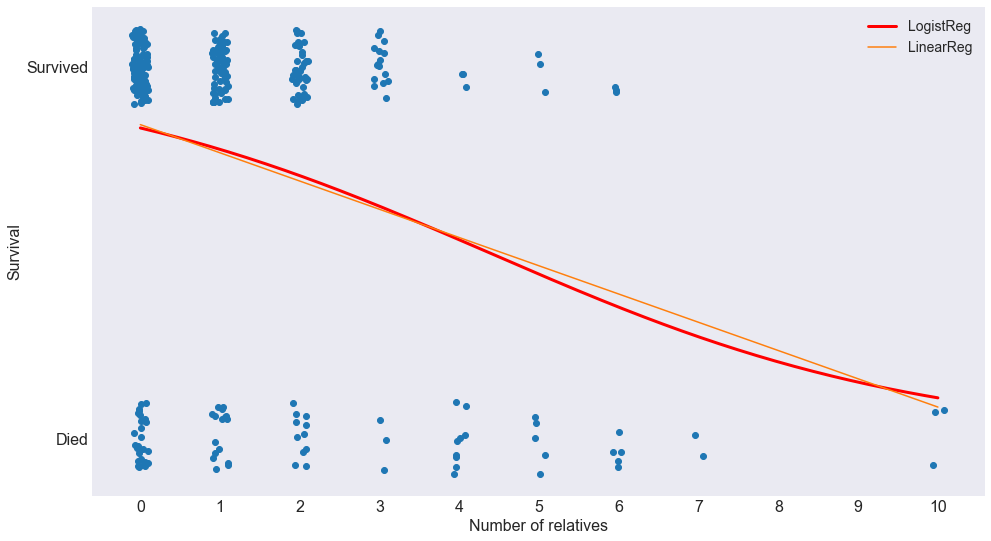

In [246]:
fig, axes = plt.subplots(1, 1, figsize=(16,9))
fig.canvas.draw()

x = temp_df[temp_df.Sex == 0]['Family']
y = temp_df[temp_df.Sex == 0]['Survived']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

clf = LogisticRegression(C=1e5)
clf.fit(x.values.reshape(-1,1), np.ravel(y.values.reshape(-1,1)))

X_test = np.linspace(x.min(), x.max(), 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
axes.plot(X_test, loss, color='red', linewidth=3, label="LogistReg")

# Did it for better comprehension of the chart
axes.plot(
    temp_df[temp_df.Sex == 0]['Family'].apply(lambda x: np.random.uniform(x-0.1, x+0.1)), 
    temp_df[temp_df.Sex == 0]['Survived'].apply(lambda x: np.random.uniform(x-0.1, x+0.1)), 'o')
axes.plot(x, slope*x + intercept, label="LinearReg")
axes.set_ylabel('Survival', fontsize=16)
axes.set_xlabel('Number of relatives', fontsize=16)

labels_y = [item.get_text() for item in axes.get_yticklabels()]
labels_y = [''] * len(labels_y)
labels_y[1] = 'Died'
labels_y[-2] = 'Survived'
labels_x = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
axes.xaxis.set_ticks(np.arange(0, 11, 1))
axes.legend(fontsize=14)

axes.set_yticklabels(labels_y, fontsize=16)
axes.set_xticklabels(labels_x, fontsize=16)
print('\0')

The $R^2 \approx 9\%$ it means that for the women kins presence (1-3 kins) explains 9% of their survival. $p-value < \alpha$, that means that $H_0$ is rejected and $H_a$ is accepted.

***Women's kins prsence does affect to the survival.***

In [247]:
np.exp(clf.coef_)

array([[0.69035127]])

In [248]:
r_value

-0.3037171930565283

In [249]:
r_value**2

0.09224413335813647

In [250]:
p_value

4.004363339114545e-08

<h4>Family presence feature</h4>

I am bufling thro the two last hypthesis testing above. Where one says that the number of kins is nothing for the survival, in spite the second shows that for women relatives presence is affect somehow to the survival. I decided to turn in another parameter **hasFamily** - binary parameter which shows, has a passenger family or not.

In [251]:
data_train['hasFamily'] = data_train['Family'].apply(lambda x: 1 if x > 0 else 0)
data_test['hasFamily'] = data_test['Family'].apply(lambda x: 1 if x > 0 else 0)

According to the chart below we can assume that those passengers who have family get the higher chances to survive. However, the chances for both (have/haven't family) for women of the 1'st and 2'nd class are pretty equal. For the women of the 3'd class the rule: has family ==> higher chances to survive doesn't work.

 


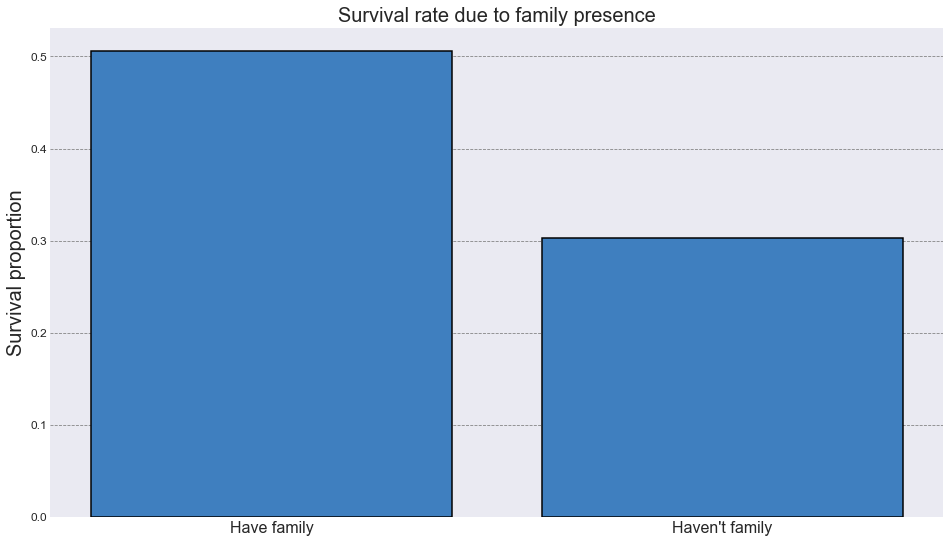

In [252]:
plt.figure(figsize=(16,9))
barplot(
    ['Have family', "Haven't family"],
    [
        survival_rate(data_train[data_train.hasFamily == 1]),
        survival_rate(data_train[data_train.hasFamily == 0])
    ],
    "Survival rate due to family presence",
    y_label="Survival proportion"
)
print('\0')

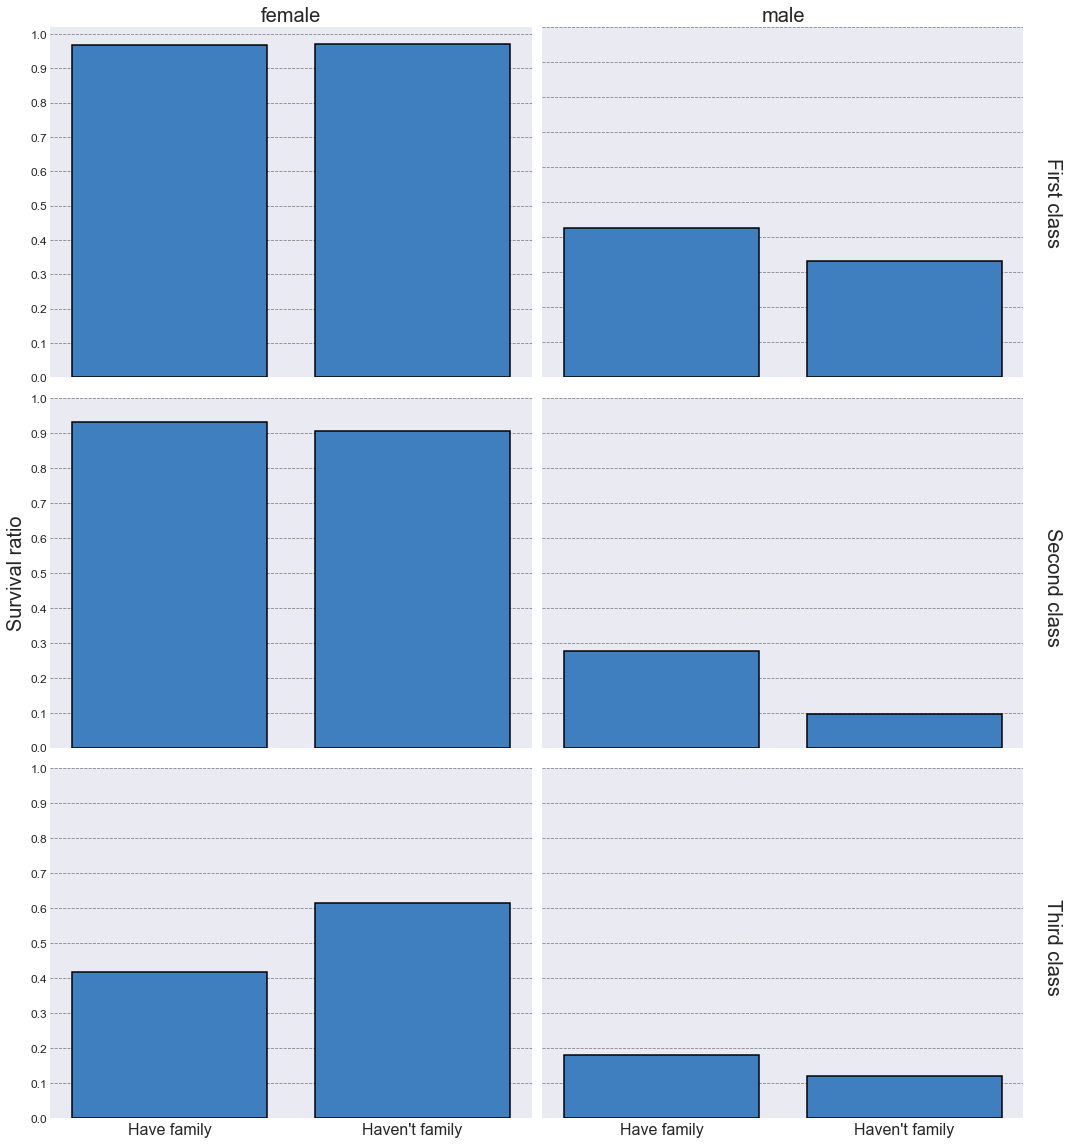

In [253]:
fig, axes = plt.subplots(3, 2, figsize=(16,16))

barplot(
    ['Have family', "Haven't family"],
    [
        survival_rate(data_train[data_train.Pclass == 1].loc[data_train.Sex == 'female'].loc[data_train.hasFamily == 1]),
        survival_rate(data_train[data_train.Pclass == 1].loc[data_train.Sex == 'female'].loc[data_train.hasFamily == 0])
    ],
    'female',
    ax=axes[0,0]
)

barplot(
    ['Have family', "Haven't family"],
    [
        survival_rate(data_train[data_train.Pclass == 2].loc[data_train.Sex == 'female'].loc[data_train.hasFamily == 1]),
        survival_rate(data_train[data_train.Pclass == 2].loc[data_train.Sex == 'female'].loc[data_train.hasFamily == 0])
    ],
    '',
    y_label='Survival ratio',
    ax=axes[1,0]
)

barplot(
    ['Have family', "Haven't family"],
    [
        survival_rate(data_train[data_train.Pclass == 3].loc[data_train.Sex == 'female'].loc[data_train.hasFamily == 1]),
        survival_rate(data_train[data_train.Pclass == 3].loc[data_train.Sex == 'female'].loc[data_train.hasFamily == 0])
    ],
    '',
    ax=axes[2,0]
)

barplot(
    ['Have family', "Haven't family"],
    [
        survival_rate(data_train[data_train.Pclass == 1].loc[data_train.Sex == 'male'].loc[data_train.hasFamily == 1]),
        survival_rate(data_train[data_train.Pclass == 1].loc[data_train.Sex == 'male'].loc[data_train.hasFamily == 0])
    ],
    'male',
    ax=axes[0,1]
)

barplot(
    ['Have family', "Haven't family"],
    [
        survival_rate(data_train[data_train.Pclass == 2].loc[data_train.Sex == 'male'].loc[data_train.hasFamily == 1]),
        survival_rate(data_train[data_train.Pclass == 2].loc[data_train.Sex == 'male'].loc[data_train.hasFamily == 0])
    ],
    '',
    ax=axes[1,1]
)

barplot(
    ['Have family', "Haven't family"],
    [
        survival_rate(data_train[data_train.Pclass == 3].loc[data_train.Sex == 'male'].loc[data_train.hasFamily == 1]),
        survival_rate(data_train[data_train.Pclass == 3].loc[data_train.Sex == 'male'].loc[data_train.hasFamily == 0])
    ],
    '',
    ax=axes[2,1]
)
axes[0,0].yaxis.set_ticks(np.arange(0, 1.02, 0.1))
axes[1,0].yaxis.set_ticks(np.arange(0, 1.02, 0.1))
axes[2,0].yaxis.set_ticks(np.arange(0, 1.02, 0.1))
axes[0,1].yaxis.set_ticks(np.arange(0, 1.02, 0.1))
axes[1,1].yaxis.set_ticks(np.arange(0, 1.02, 0.1))
axes[2,1].yaxis.set_ticks(np.arange(0, 1.02, 0.1))

axes[0,0].xaxis.set_ticklabels([])
axes[1,0].xaxis.set_ticklabels([])
axes[0,1].xaxis.set_ticklabels([])
axes[1,1].xaxis.set_ticklabels([])

axes[0,1].yaxis.set_ticklabels([])
axes[1,1].yaxis.set_ticklabels([])
axes[2,1].yaxis.set_ticklabels([])

axes[0,1].annotate('First class', xy=(520, 220), xycoords='axes points',
            size=20, ha='right', va='top', rotation=270)
axes[1,1].annotate('Second class', xy=(520, 220), xycoords='axes points',
            size=20, ha='right', va='top', rotation=270)
axes[2,1].annotate('Third class', xy=(520, 220), xycoords='axes points',
            size=20, ha='right', va='top', rotation=270)


fig.tight_layout()

<h3>Statistical Analysis 3</h3>

I suppose it is crucial to check the **hasFamily** for the statistical significance, because in the survey above we figured out that the family presence (in the term of number of family's members) isn't one.

$$
H_0 = \textbf{hasFamily}\ \text{(binary parameter) doesn't affect to the survival.}\ R^2 \approx 0
$$

$$
H_a = \textbf{hasFamily}\ \text{(binary parameter) does affect to the survival.}\ R^2 \gg 0
$$

$$
\alpha = 0.05
$$

 


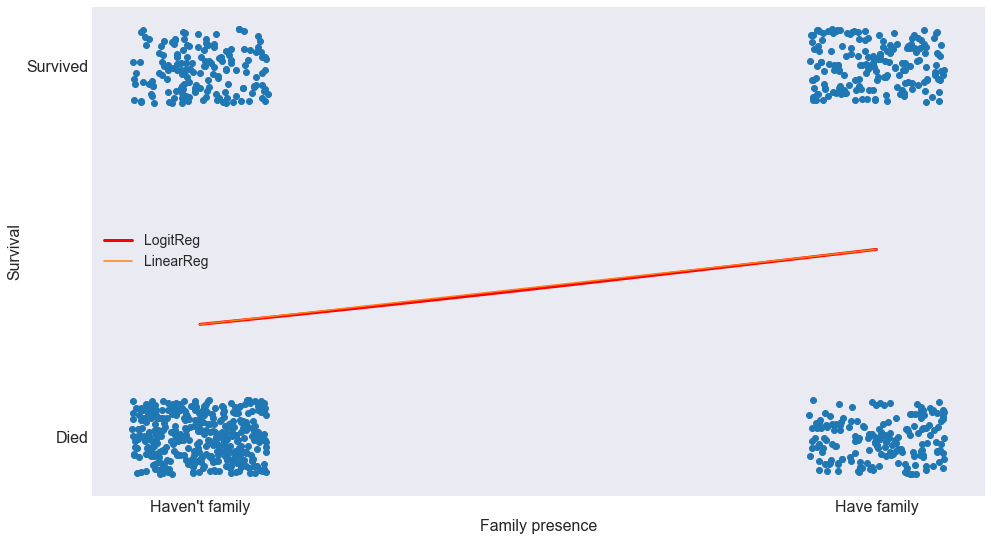

In [254]:
fig, axes = plt.subplots(1, 1, figsize=(16,9))
fig.canvas.draw()

x = data_train['hasFamily']
y = data_train['Survived']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

clf = LogisticRegression(C=1e5)
clf.fit(x.values.reshape(-1,1), np.ravel(y.values.reshape(-1,1)))

X_test = np.linspace(x.min(), x.max(), 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
axes.plot(X_test, loss, color='red', linewidth=3, label="LogitReg")

# Did it for better comprehension of the chart
axes.plot(
    data_train['hasFamily'].apply(lambda x: np.random.uniform(x-0.1, x+0.1)), 
    data_train['Survived'].apply(lambda x: np.random.uniform(x-0.1, x+0.1)), 'o')
axes.plot(x, slope*x + intercept, label="LinearReg")
axes.set_ylabel('Survival', fontsize=16)
axes.set_xlabel('Family presence', fontsize=16)

labels_y = [item.get_text() for item in axes.get_yticklabels()]
labels_y = [''] * len(labels_y)
labels_y[1] = 'Died'
labels_y[-2] = 'Survived'
labels_x = ["Haven't family", "Have family"]
axes.xaxis.set_ticks(np.arange(0, 2, 1))

axes.legend(fontsize=14)
axes.set_yticklabels(labels_y, fontsize=16)
axes.set_xticklabels(labels_x, fontsize=16)
print('\0')

$R^2 \approx 4%$ and infinitesimal $p-value$ assign that $H_a$ accepted and it means that **hasFamily** affects to the survival.

In [255]:
np.exp(clf.coef_)

array([[2.34692292]])

In [256]:
r_value

0.2033670856998922

In [257]:
r_value**2

0.0413581715460673

In [258]:
p_value

9.009490179329067e-10

<h4>Cabin again</h4>

Do you still remember what we've [figured out](#Cabin-NaN)? Ok, ok, I will recall. We ascertain that on the body of the Herbert Cave was found partial listing of first class cabin accommodation. Thus we assumed that, thos passengers in dataset who have a Cabin number, and it not belongs to the first class - therefore these passengers are alive.  

According to the two charts below we can say that we were right. 

***Those who have Cabin's number, especially the mans of the 2'nd and 3'd classes have higher chances to survive.***

In [259]:
data_train['NotNanCabin'] = data_train['Cabin'].apply(lambda x: 0 if x != x else 1)
data_test['NotNanCabin'] = data_test['Cabin'].apply(lambda x: 0 if x != x else 1)

 


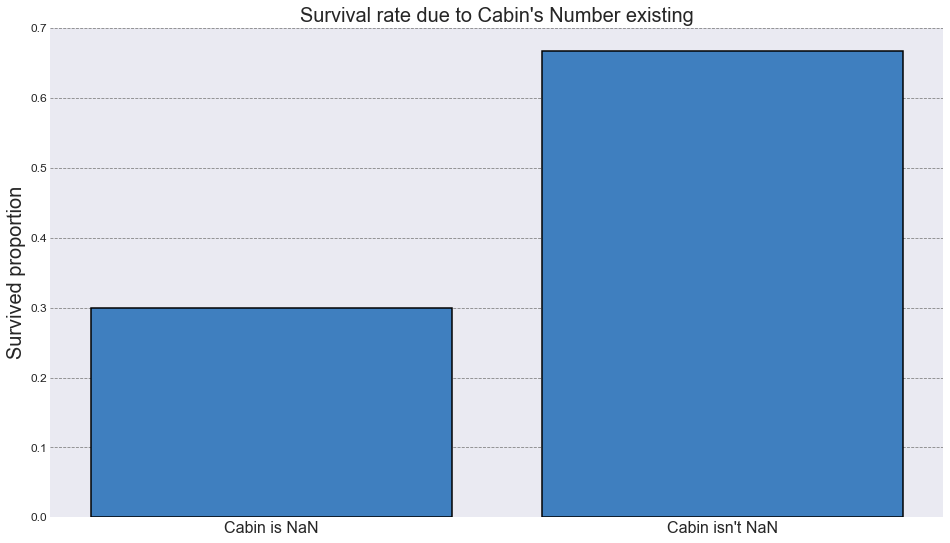

In [260]:
plt.figure(figsize=(16,9))

barplot(
    ['Cabin is NaN', "Cabin isn't NaN"],
    [
        survival_rate(data_train[data_train.NotNanCabin == 0]),
        survival_rate(data_train[data_train.NotNanCabin == 1])
    ], 
    "Survival rate due to Cabin's Number existing",
    y_label="Survived proportion"
)
print('\0')

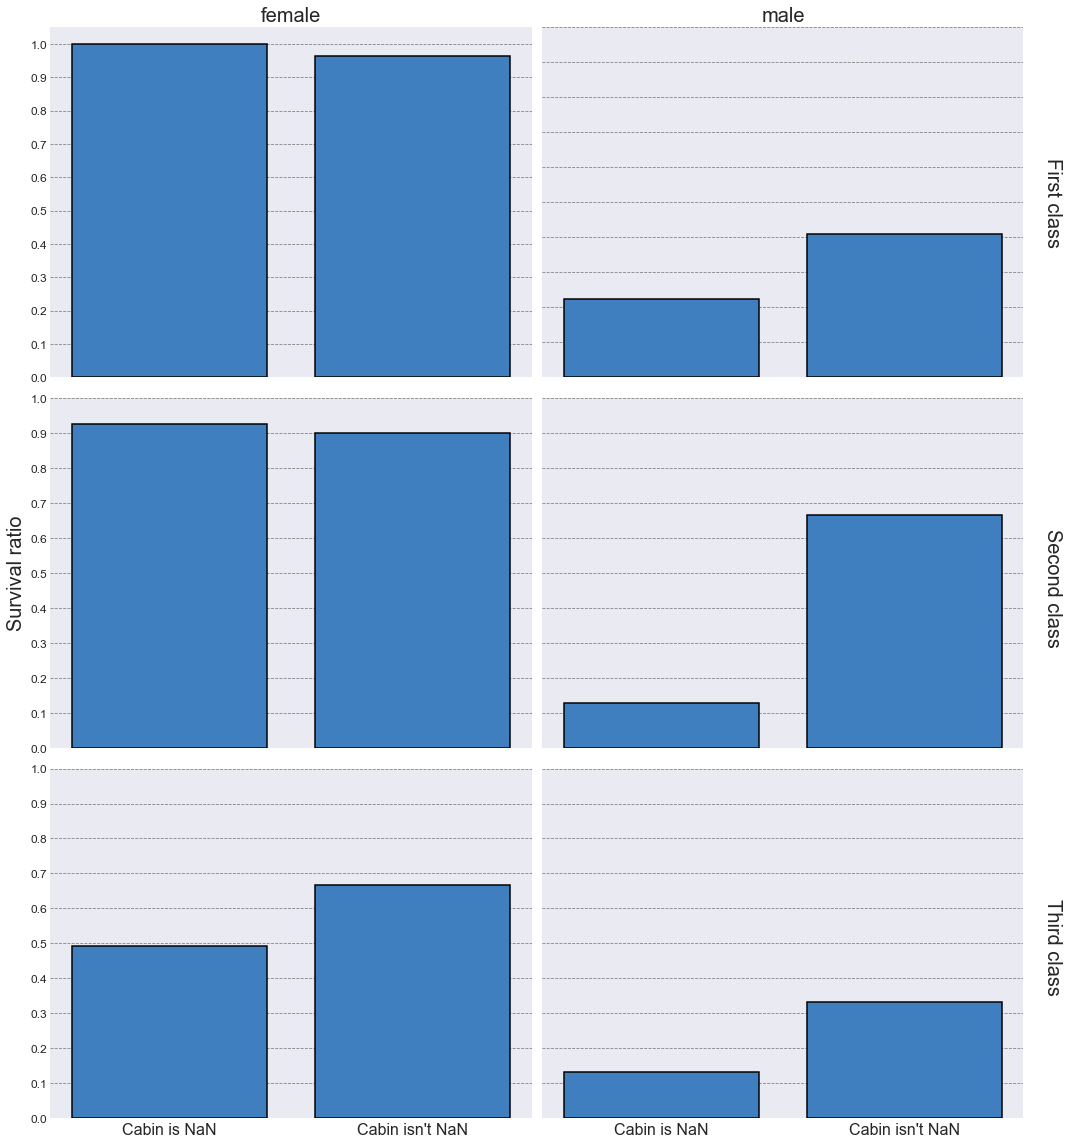

In [261]:
fig, axes = plt.subplots(3, 2, figsize=(16,16))

barplot(
    ['Cabin is NaN', "Cabin isn't NaN"],
    [
        survival_rate(data_train[data_train.Pclass == 1].loc[data_train.Sex == 'female'].loc[data_train.NotNanCabin == 0]),
        survival_rate(data_train[data_train.Pclass == 1].loc[data_train.Sex == 'female'].loc[data_train.NotNanCabin == 1])
    ],
    'female',
    ax=axes[0,0]
)

barplot(
    ['Cabin is NaN', "Cabin isn't NaN"],
    [
        survival_rate(data_train[data_train.Pclass == 2].loc[data_train.Sex == 'female'].loc[data_train.NotNanCabin == 0]),
        survival_rate(data_train[data_train.Pclass == 2].loc[data_train.Sex == 'female'].loc[data_train.NotNanCabin == 1])
    ],
    '',
    y_label='Survival ratio',
    ax=axes[1,0]
)

barplot(
    ['Cabin is NaN', "Cabin isn't NaN"],
    [
        survival_rate(data_train[data_train.Pclass == 3].loc[data_train.Sex == 'female'].loc[data_train.NotNanCabin == 0]),
        survival_rate(data_train[data_train.Pclass == 3].loc[data_train.Sex == 'female'].loc[data_train.NotNanCabin == 1])
    ],
    '',
    ax=axes[2,0]
)

barplot(
    ['Cabin is NaN', "Cabin isn't NaN"],
    [
        survival_rate(data_train[data_train.Pclass == 1].loc[data_train.Sex == 'male'].loc[data_train.NotNanCabin == 0]),
        survival_rate(data_train[data_train.Pclass == 1].loc[data_train.Sex == 'male'].loc[data_train.NotNanCabin == 1])
    ],
    'male',
    ax=axes[0,1]
)

barplot(
    ['Cabin is NaN', "Cabin isn't NaN"],
    [
        survival_rate(data_train[data_train.Pclass == 2].loc[data_train.Sex == 'male'].loc[data_train.NotNanCabin == 0]),
        survival_rate(data_train[data_train.Pclass == 2].loc[data_train.Sex == 'male'].loc[data_train.NotNanCabin == 1])
    ],
    '',
    ax=axes[1,1]
)

barplot(
    ['Cabin is NaN', "Cabin isn't NaN"],
    [
        survival_rate(data_train[data_train.Pclass == 3].loc[data_train.Sex == 'male'].loc[data_train.NotNanCabin == 0]),
        survival_rate(data_train[data_train.Pclass == 3].loc[data_train.Sex == 'male'].loc[data_train.NotNanCabin == 1])
    ],
    '',
    ax=axes[2,1]
)
axes[0,0].yaxis.set_ticks(np.arange(0, 1.02, 0.1))
axes[1,0].yaxis.set_ticks(np.arange(0, 1.02, 0.1))
axes[2,0].yaxis.set_ticks(np.arange(0, 1.02, 0.1))
axes[0,1].yaxis.set_ticks(np.arange(0, 1.02, 0.1))
axes[1,1].yaxis.set_ticks(np.arange(0, 1.02, 0.1))
axes[2,1].yaxis.set_ticks(np.arange(0, 1.02, 0.1))

axes[0,0].xaxis.set_ticklabels([])
axes[1,0].xaxis.set_ticklabels([])
axes[0,1].xaxis.set_ticklabels([])
axes[1,1].xaxis.set_ticklabels([])

axes[0,1].yaxis.set_ticklabels([])
axes[1,1].yaxis.set_ticklabels([])
axes[2,1].yaxis.set_ticklabels([])

axes[0,1].annotate('First class', xy=(520, 220), xycoords='axes points',
            size=20, ha='right', va='top', rotation=270)
axes[1,1].annotate('Second class', xy=(520, 220), xycoords='axes points',
            size=20, ha='right', va='top', rotation=270)
axes[2,1].annotate('Third class', xy=(520, 220), xycoords='axes points',
            size=20, ha='right', va='top', rotation=270)


fig.tight_layout()

<h2>Recap of the survey</h2>

Let's summarize everything we explored.

1. We've proved that a class reflects the social class of a passenger, however it isn't crucial for the Survival.
2. Also extracted and proved that the Age depends on Pclass (at 14%)
3. Added up new feature's variables: HonCl, hasFamily, NotNanCabin
4. Those variables which were removed, are statistically insignificant

**New variables**

1. **hasFamily** - the indicator, if a passenger has family
2. **HonCl** - Honorific Class (Nobility, Miss, Mrs, Master, Mr)
3. **NotNanCabin** - the variable responsible for indicating is the ***Cabin*** variable is NaN.

In [262]:
data_train, rels = categorical_to_numeric(data_train, drop=['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Honorific'])

 


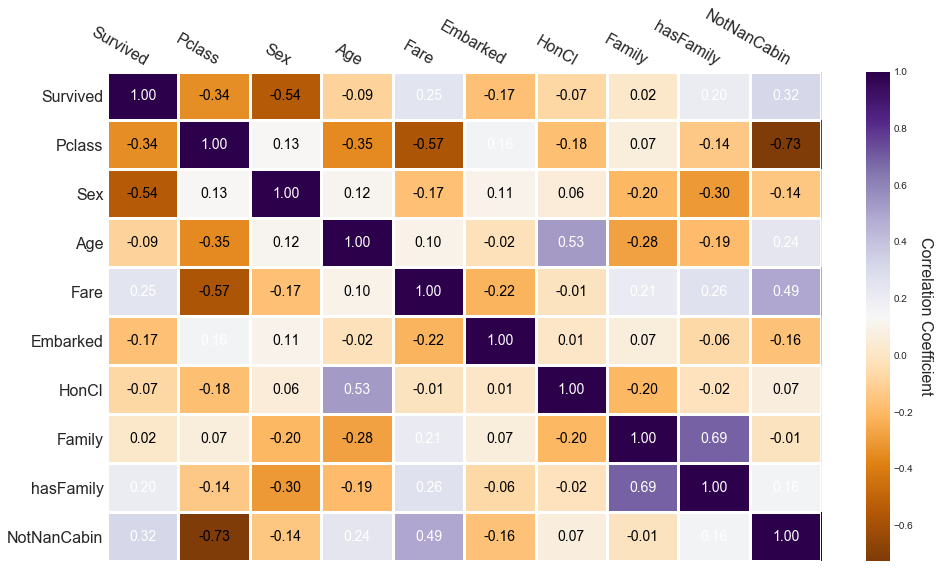

In [263]:
fig, axes = plt.subplots(1, 1, figsize=(16,9))

corrplot(
    data_train,
    cbarlabel="Correlation Coefficient",
    text_kw=dict(fontsize=14),
    cmap="PuOr",
    aspect='auto',
    ax=axes
)

print('\0')

<h2>Build models</h2>

Though, we have the tet's dataset provided by Kaggle, however we have to split the train data onto train and test datasets, before we will apply a model to the test's dataset by Kaggle. Splitting, according to the rule 80/20 

In [271]:
X_train, X_test, y_train, y_test = train_test_split(data_train.drop('Survived', axis=1), data_train['Survived'], train_size = 0.8, random_state = 20)

We use the ROC and AUC metrics for the model evaluation. And in purpose to proper evaluate a model we will use the repeated K-folds with 10 repeats and 10 folds.

In [272]:
K_fold = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)

Let's choose 10 most popular Classificators.

* KNN
* AdaBoost
* Decision Tree
* Random Forest
* Extra Trees
* Support Vector Machine
* Gradient Boosting
* Logistic regression
* Linear Discriminant Analysis
* Multiple layer perceprton

In [273]:
rs = 2
base_models = []
cross_validation_res = []
cross_validation_mean = []
cross_validation_std = []

base_models.append(KNeighborsClassifier())
base_models.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=rs),random_state=2,learning_rate=0.1))
base_models.append(DecisionTreeClassifier(random_state=rs))
base_models.append(RandomForestClassifier(random_state=rs))
base_models.append(ExtraTreesClassifier(random_state=rs))
base_models.append(SVC(random_state=rs))
base_models.append(GradientBoostingClassifier(random_state=rs))
base_models.append(LogisticRegression(random_state = rs))
base_models.append(LinearDiscriminantAnalysis())
base_models.append(MLPClassifier(random_state=rs))

In [274]:
for model in base_models :
    cross_validation_res.append(cross_val_score(model, X_train, y_train, scoring="roc_auc", cv=K_fold, n_jobs=4))

In [275]:
for cv_result in cross_validation_res:
    cross_validation_mean.append(cv_result.mean())
    cross_validation_std.append(cv_result.std())

cross_validation_frame = pd.DataFrame(
    {
        "CrossValMeans": cross_validation_mean,
        "CrossValErrors": cross_validation_std,
        "Algorithms":[
                     "KNeighboors",
                     "AdaBoost", 
                     "DecisionTree",   
                     "RandomForest",
                     "ExtraTrees",
                     "SVC",
                     "GradBoosting",                      
                     "LogistRegr",
                     "LinDiscrAnal",
                     "MultiLayerPerc"]
    })

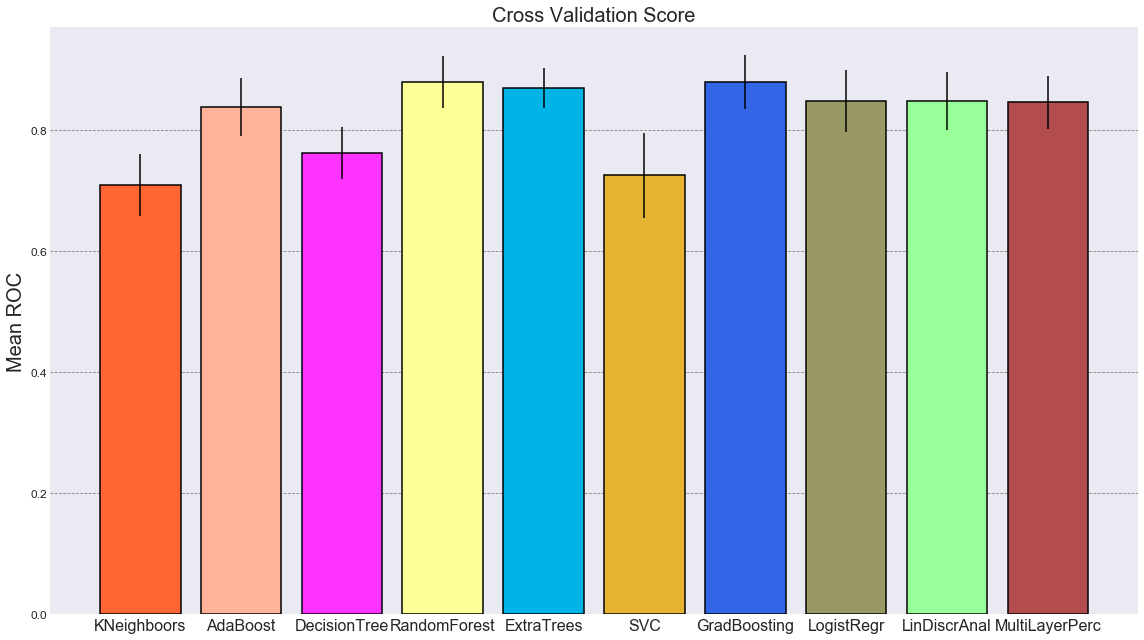

In [276]:
fig, axes = plt.subplots(1, 1, figsize=(16,9))

barplot(
    cross_validation_frame['Algorithms'],
    cross_validation_frame['CrossValMeans'],
    "Cross Validation Score",
    yerr=cross_validation_frame['CrossValErrors'], 
    y_label="Mean ROC",
    color=['#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6', 
		  '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D',
		  '#80B300', '#809900', '#E6B3B3', '#6680B3', '#66991A', 
		  '#FF99E6', '#CCFF1A', '#FF1A66', '#E6331A', '#33FFCC',
		  '#66994D', '#B366CC', '#4D8000', '#B33300', '#CC80CC', 
		  '#66664D', '#991AFF', '#E666FF', '#4DB3FF', '#1AB399',
		  '#E666B3', '#33991A', '#CC9999', '#B3B31A', '#00E680', 
		  '#4D8066', '#809980', '#E6FF80', '#1AFF33', '#999933',
		  '#FF3380', '#CCCC00', '#66E64D', '#4D80CC', '#9900B3', 
		  '#E64D66', '#4DB380', '#FF4D4D', '#99E6E6', '#6666FF']
)
fig.tight_layout()

Now I wanna explore these Algorithms discretely:
* GBC Classifier
* Linear Discriminant Analysis
* Logistic Regression
* Random Forest Classifer
* Gaussian Naive Bayes
* Support Vectore Machine

In [277]:
gmc_model = GradientBoostingClassifier()

scores = cross_val_score(gmc_model, X_train, y_train, cv=K_fold,
                       n_jobs = 4, scoring = 'roc_auc')

round(np.mean(scores)*100, 2)

88.18

In [278]:
lda_model= LinearDiscriminantAnalysis()

scores = cross_val_score(lda_model, X_train, y_train, cv=K_fold,
                       n_jobs=4, scoring='roc_auc')

round(np.mean(scores)*100, 2)

84.97

In [279]:
logit_model = LogisticRegression()
scores = cross_val_score(logit_model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='roc_auc')

round(np.mean(scores)*100, 2)

84.77

In [280]:
rfc_model = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(rfc_model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='roc_auc')

round(np.mean(scores)*100, 2)

86.5

In [281]:
gnb_model = GaussianNB()

scores = cross_val_score(gnb_model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='roc_auc')

round(np.mean(scores)*100, 2)

82.45

In [282]:
svm_model = SVC(C=1, gamma='scale', kernel='linear')

scores = cross_val_score(svm_model, X_train, y_train, cv=K_fold, 
                        n_jobs=4, scoring='roc_auc')

round(np.mean(scores)*100, 2)

83.9

In [ ]:
gbc = GradientBoostingClassifier()
gb_param_grid = {
              'loss' : ["deviance", "exponential"],
              'n_estimators' : [100, 200, 300],
              'learning_rate': [0.1, 0.05, 0.01, 0.001],
              'max_depth': [4, 8, 16],
              'min_samples_leaf': [100, 150, 250],
              'max_features': [None, 0.3, 0.1]
              }

gs_gbc = GridSearchCV(gbc, param_grid = gb_param_grid, cv=K_fold, 
                     scoring="roc_auc", n_jobs= 4, verbose = 2)

gs_gbc.fit(X_train, y_train)
gbc_best = gs_gbc.best_estimator_
gbc_best_params = gs_gbc.best_params_

gs_gbc.best_score_

In [ ]:
rfc = RandomForestClassifier()

rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100, 200, 300, 400],
              "criterion": ["gini", "entropy"]}


gs_rfc = GridSearchCV(rfc, param_grid = rf_param_grid, cv=K_fold,
                     scoring="roc_auc", n_jobs= 4, verbose = 1)

gs_rfc.fit(X_train, y_train)
rfc_best = gs_rfc.best_estimator_
rfc_best_params = gs_rfc.best_params_

gs_rfc.best_score_

In [ ]:
logit = LogisticRegression()

lr_param_grid = {"penalty" : ["l2"],
              "tol" : [0.0001,0.0002,0.0003],
              "max_iter": [100,200,300],
              "C" :[0.01, 0.1, 1, 10, 100],
              "intercept_scaling": [1, 2, 3, 4],
              "solver":['liblinear', 'lbfgs'],
              "verbose":[1]}


gs_logit = GridSearchCV(logit, param_grid = lr_param_grid, cv=K_fold,
                     scoring="roc_auc", n_jobs= 4, verbose = 2)

gs_logit.fit(X_train, y_train)
logit_best = gs_logit.best_estimator_
logit_best_params = gs_logit.best_params_

gs_logit.best_score_

In [ ]:
lda = LinearDiscriminantAnalysis()

lda_param_grid = {"solver" : ["svd", "lsqr"],
              "tol" : [0.0001, 0.0002, 0.0003]}


gs_lda = GridSearchCV(lda, param_grid = lda_param_grid, cv=K_fold,
                     scoring="roc_auc", n_jobs= 4, verbose = 2)

gs_lda.fit(X_train, y_train)
lda_best = gs_lda.best_estimator_
lda_best_params = gs_lda.best_params_

gs_lda.best_score_

In [ ]:
svm = SVC(probability=True)
svc_param_grid = {'kernel': ["linear", "rbf"], 
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300]}

gs_svm = GridSearchCV(svm, param_grid = svc_param_grid, cv = K_fold,
                      scoring="roc_auc", n_jobs= -1, verbose = 2)

gs_svm.fit(X_train, y_train)

svm_best = gs_svm.best_estimator_
svm_best_params = gs_svm.best_params_

# Best score
gs_svm.best_score_

Fitting 100 folds for each of 120 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 704 tasks      | elapsed: 17.1min
